# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

**Installing uszipcode to use this package**

In [ ]:
# Install the uszipcode package, which is a powerful tool to search and query U.S. ZIP code database
!pip install uszipcode

# Install a specific version (1.4.28.3) of the sqlalchemy_mate package, which provides utilities and helpers for SQLAlchemy, a SQL toolkit and Object-Relational Mapping (ORM) library for Python
!pip install sqlalchemy_mate==1.4.28.3


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [143]:
# Import pandas library for data manipulation
import pandas as pd

# Import numpy library for numerical operations
import numpy as np

# Import matplotlib's pyplot module for plotting
import matplotlib.pyplot as plt

# Import seaborn library for statistical data visualization
import seaborn as sns

# Import the SearchEngine class from the uszipcode library to check the zipcodes
from uszipcode import SearchEngine

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    classification_report,
)

import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [144]:
# Import the drive module from google.colab to handle Google Drive operations
from google.colab import drive

# Mount the Google Drive to the specified directory ('/content/drive')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# Read the CSV file 'Loan_Modelling.csv' into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_learning/Macnine learning/Project/v1_my_code/Loan_Modelling.csv')

In [146]:
# Make a copy of the original DataFrame 'data' and store it in 'df'
df = data.copy()

## Data Overview

* Observations
* Sanity checks

### View the first and last 5 rows of the dataset.

In [147]:
# Display the first 5 rows of the DataFrame 'df' to get a quick overview of the data
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [148]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Check the shape of the dataset

In [149]:
# Retrieve the dimensions (rows, columns) of the DataFrame `df`
df.shape

(5000, 14)

 **Observations**
* There are 5000 rows and 14 columns

### Check the datatypes of the columns

In [150]:
# Display concise summary information about DataFrame `df`, including column names, data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**
* All columns are numeric, Average spending on credit cards per month(CCAVG) is float64 and other are int64

### Check statistical summary for the dataset

In [151]:
# Generate descriptive statistics for DataFrame `df` and transpose the result for easier reading.
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observations**   
* Customers' **Age** is in the range of **23** years old to **67** years old, with a mean and median around **45** years old.
* The maximum **Experience** among customers is **43 years**, while the mean and median experience are around **20 years**. The min Experience is **-3 years** which does not seem reasonable, hence requires a closer look
* **Income** ranges from **8000 USD** to **224,000 USD**. The mean income is around **73,700 USD**, and the median income is **64,000 USD**.
* The **Zip codes** shall not be treated as an integer value as it reflects location - will convert to city names in future
* The min **Family** size is **1 person**, max is **4 persons**  and Mean and Median around **2 person**.
* The min **CCAvg** is **0k USD**, max is **10K USD**  and average is around **1.9K USD**
* The **Education** is a categorical variable where 1: Undergrad; 2: Graduate;3: Advanced/Professional
* The min and median **Mortgage** is **0k USD**, max is **635K USD**  and mean is **56.49K USD** - Dataset heavily right skewed
* The **Personal_Loan** is a categorical variable where 1: customer accepted the personal loan offered in the last campaign and 0:customer didnot accept
* The **Securities_Account** is a categorical variable where 1: customer has Securities_Account 0:customer does not have Securities_Account
* The **CD_Account** is a categorical variable where 1: customer has CD_Account 0:customer does not have CD_Account
* The **Online** is a categorical variable where 1: customer uses online banking 0:customer does use online banking
* The **CreditCard** is a categorical variable where 1: customer use a credit card issued by any other Bank 0:customer does not use a credit card issued by any other Bank


### Check null and duplicated values for the dataset

In [152]:
# Count the number of missing values (null values) in each column of DataFrame `df`.
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [153]:
# Count the number of duplicated rows in DataFrame `df`.
df.duplicated().sum()

0

**Observations:**
* There are no null value
* There are no duplicated rows

#### Check the ID

In [154]:
df['ID'].duplicated().sum()

0

* There are no duplicated in ID will drop the ID as we don't need it for our model

* Dropping the ID

In [155]:
df.drop('ID', axis=1, inplace=True)

### Check Education unique values

In [156]:
# Count the occurrences of each unique value in the 'Education' column of DataFrame `df`.
df['Education'].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

### Check Experience values to find number of negative vlues

In [157]:
# Count occurrences of negative values in the 'Experience' column of DataFrame `df`
# and print the count for each unique negative value.
print(df[df['Experience'] < 0]['Experience'].value_counts())

# Calculate the total number of negative experiences and print a separator and the result.
sum_of_negative_experience = df[df['Experience'] < 0]['Experience'].value_counts().sum()
print('_' * 20, 'Sum of negative experience', '_' * 20)
print(f'Sum of negative experiences is: {sum_of_negative_experience}')

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64
____________________ Sum of negative experience ____________________
Sum of negative experiences is: 52


* There are 52 negative values in Experience will use the absolute value for them

**Dealing with negative experiences**

In [158]:
# Correcting the experience values
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [159]:
print(df[df['Experience'] < 0]['Experience'].value_counts())

Series([], Name: count, dtype: int64)


### Check Age values and see if there is any less than 0

In [160]:
# Count occurrences of each unique age value in the 'Age' column,
# sort them in descending order based on counts, and display the top 10.
df['Age'].value_counts().sort_values(ascending=False).head(10)

Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
Name: count, dtype: int64

In [161]:
# Count the number of rows in DataFrame `df` where the 'Age' is not correct or less than 0.
len(df[df['Age'] <= 0])

0

**Observations**
* There are no negative values for Age

### Check number of clients with mortgage

In [162]:
# Count number of persons with mortgage
len(df[df['Mortgage']>=1])

1538

In [163]:
# Chech to see if any negative values are in the mortgage
len(df[df['Mortgage']<1])

3462

**Observations**
* There are 1538 clients with Mortgage and 3462 whom does not have mortgage

### Check unique values for CD_Account, Online, CreditCard, Securities_Account, Personal_Loan and Family

In [164]:
# Iterate through the list below.
for i in ['CD_Account', 'Online', 'CreditCard', 'Securities_Account', 'Personal_Loan', 'Family']:
    # Print a separator and the name of the current column (`i`).
    print("_" * 20 + i + "_" * 20)
    # Print the value counts for the current column (`i`).
    print(df[i].value_counts())

____________________CD_Account____________________
CD_Account
0    4698
1     302
Name: count, dtype: int64
____________________Online____________________
Online
1    2984
0    2016
Name: count, dtype: int64
____________________CreditCard____________________
CreditCard
0    3530
1    1470
Name: count, dtype: int64
____________________Securities_Account____________________
Securities_Account
0    4478
1     522
Name: count, dtype: int64
____________________Personal_Loan____________________
Personal_Loan
0    4520
1     480
Name: count, dtype: int64
____________________Family____________________
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


### Check values for ZIPCode and checking if any invalid zipcodes are present

In [165]:
# Count occurrences of each unique ZIP code in the 'ZIPCode' column,
df['ZIPCode'].value_counts().sort_values(ascending=False)

ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
92694      1
90068      1
90813      1
94404      1
94598      1
Name: count, Length: 467, dtype: int64

In [166]:
# Making a copy of data to add the cities to it
df_with_city_names = df.copy()
# Creating a searchengin
sr = SearchEngine()
# Iterate over each row in df['ZIPCode'] to check if any invalid zip code is present will add None for the invalid zipcodes
for i, zip_code in enumerate(df['ZIPCode']):
    try:

        # Update DataFrame with results
        df_with_city_names.loc[i, 'City'] = sr.by_zipcode(zip_code).major_city
        df_with_city_names.loc[i, 'State'] = sr.by_zipcode(zip_code).state
        df_with_city_names.loc[i, 'County'] = sr.by_zipcode(zip_code).county
    except Exception as e:
        df_with_city_names.loc[i, 'City'] = None
        df_with_city_names.loc[i, 'State'] = None
        df_with_city_names.loc[i, 'County'] = None

In [167]:
# Calculate sum of invalid zipcodes
df_with_city_names['City'].isnull().sum()

34

In [168]:
# Check number of unique counties
df_with_city_names['County'].nunique()

38

In [169]:
# checking the number of uniques in the zip code
df_with_city_names["ZIPCode"].nunique()

467

In [170]:
# Count occurrences of each unique city name in the 'City' column and display the top 20 cities.
df_with_city_names['City'].value_counts().sort_values(ascending=False).head(20)

City
Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
Palo Alto        130
Stanford         127
Davis            121
La Jolla         112
Santa Barbara    103
San Jose          96
Santa Clara       77
Monterey          72
Pasadena          71
Irvine            58
Oakland           55
Newbury Park      53
Claremont         52
Menlo Park        52
Santa Cruz        51
Name: count, dtype: int64

**Invalid Zipcodes**

In [171]:
# Invalid zipcodes
df_with_city_names[df_with_city_names['City'].isnull()]['ZIPCode'].value_counts()

ZIPCode
92717    22
96651     6
92634     5
93077     1
Name: count, dtype: int64

There are 244 unique valid city and there are 34 rows with not accurate zip code after searching(https://www.smarty.com/articles/zip-4-code) find out the first three digits for these are valid and we can use that as unique values for zip codes. Will keep the three unique digits data after EDA section.

### Converting the data type of categorical features to 'category'


In [172]:
#  Converting the data type of categorical features to 'category'
df['ZIPCode'] = df['ZIPCode'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CD_Account'] = df['CD_Account'].astype('category')
df['Securities_Account'] = df['Securities_Account'].astype('category')
df['Personal_Loan'] = df['Personal_Loan'].astype('category')
df['Education'] = df['Education'].astype('category')

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

* Functions for ploting

In [173]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [174]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

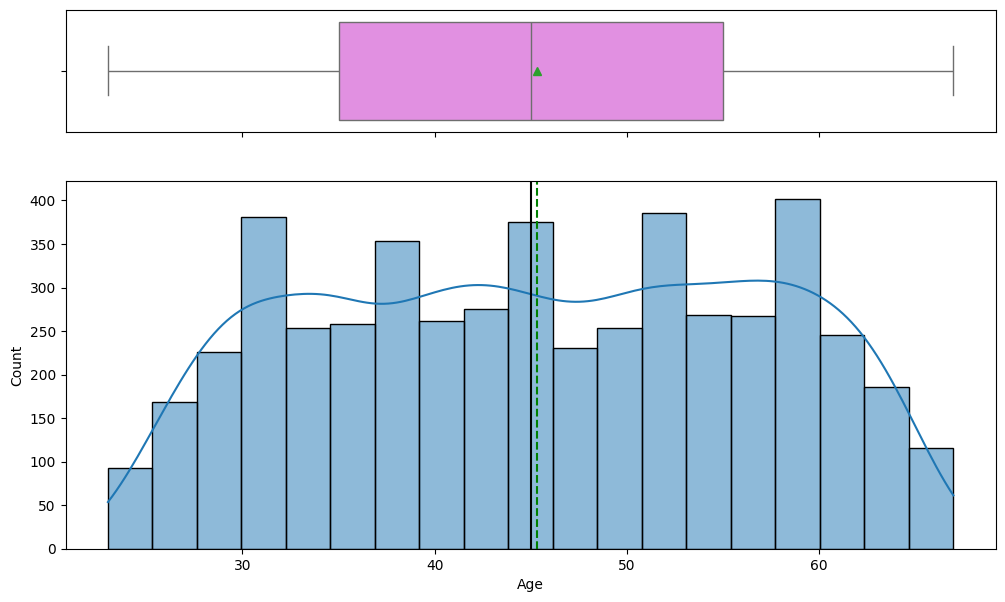

In [175]:
histogram_boxplot(df, 'Age',kde=True)

**Observations**
* The age has no outlier
* The age distribution shows distinct peaks at five different points. figure seems a multimodal distribution


#### Observations on Experience

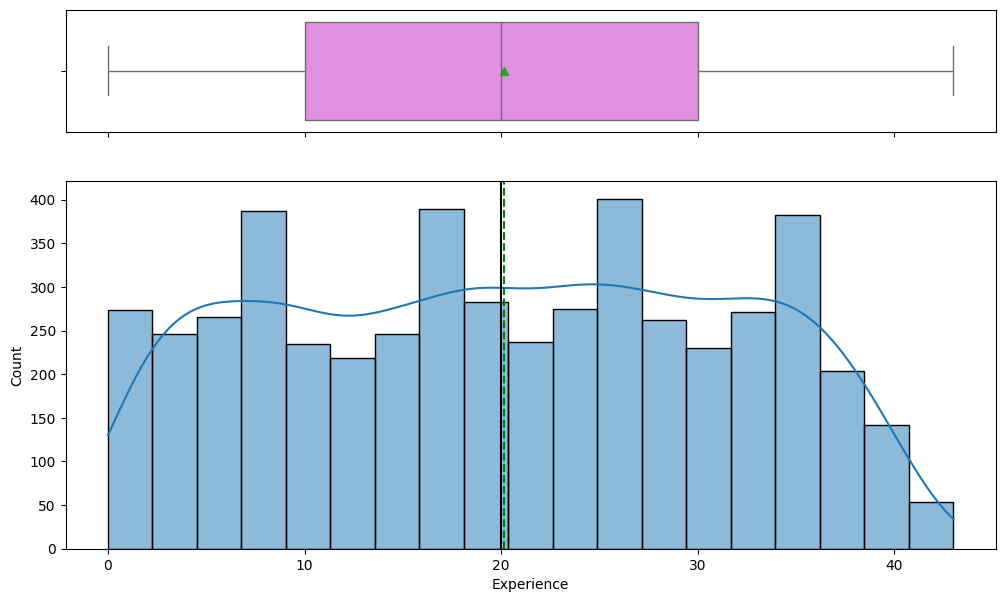

In [176]:
histogram_boxplot(df, 'Experience',kde=True)

**Observations**
* The age has no outlier
* The age distribution shows distinct peaks at five different points. figure seems a multimodal distribution

#### Observations on Income

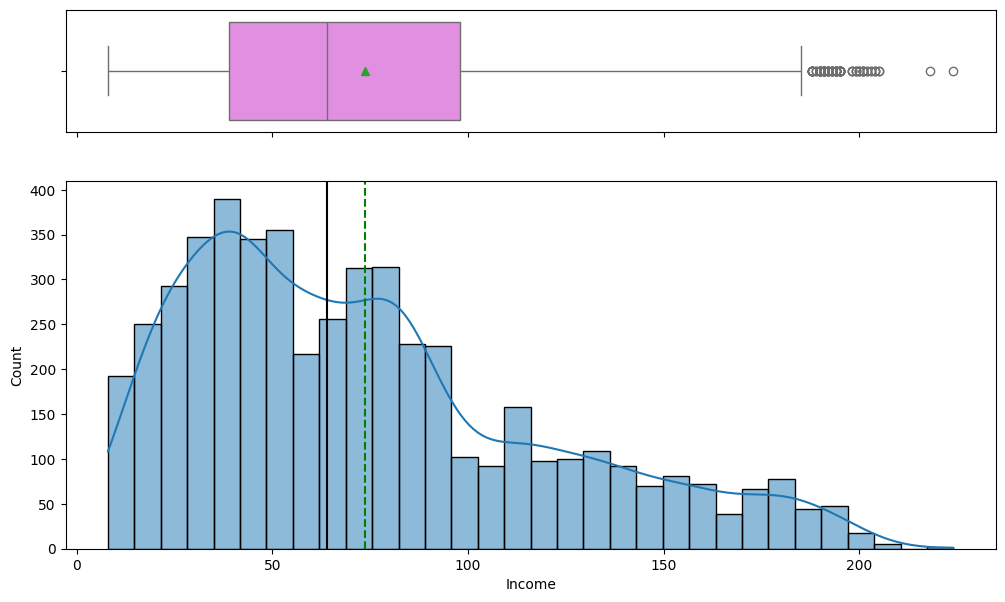

In [177]:
histogram_boxplot(df, 'Income',kde=True)

**Observations**
* Income distribution is right-skewed
* There are some high outliers

#### Observations on CCAvg

In [178]:
df_cs_without_ccavg = df[df['CCAvg'] == 0]
df_cs_without_ccavg.shape

(106, 13)

In [179]:
# Compare the number of customers with a credit card to the number of customers with a CCAvg value of 0
no_other_credit_card_count = len(df[df['CreditCard'] == 0])
zero_ccavg_count = len(df[df['CCAvg'] == 0])

# Print the results
print(f"Number of customers with no other credit card: {no_other_credit_card_count}")
print(f"Number of customers with CCAvg of 0: {zero_ccavg_count}")

print(f"Number of customers with all bank credit card: {len(df['CCAvg'])}")


Number of customers with no other credit card: 3530
Number of customers with CCAvg of 0: 106
Number of customers with all bank credit card: 5000


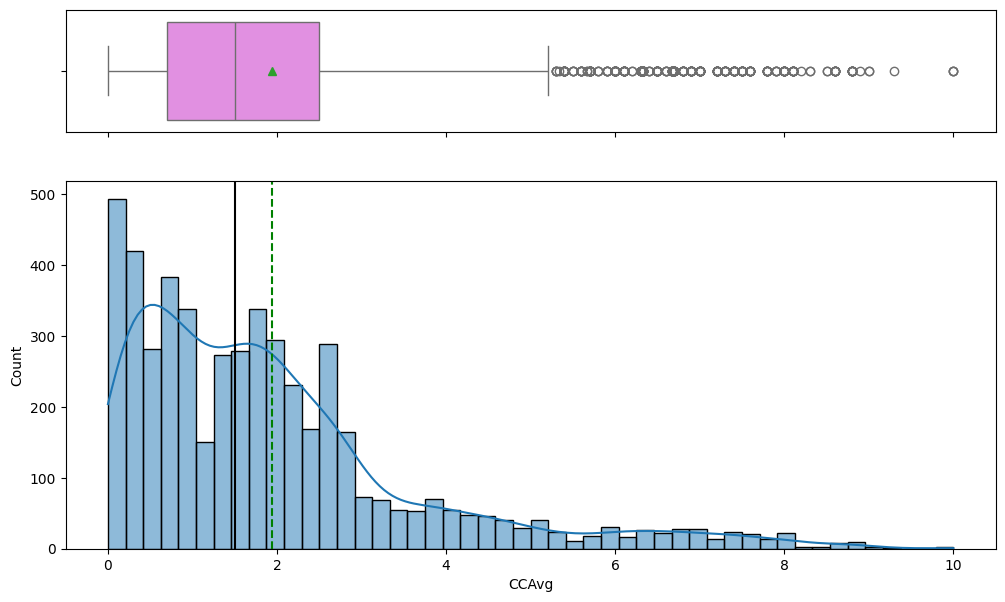

In [180]:
histogram_boxplot(df, 'CCAvg',kde=True)

**Observations**
* CCAvg distribution is right-skewed
* There are some high outliers

#### Observations on Mortgage

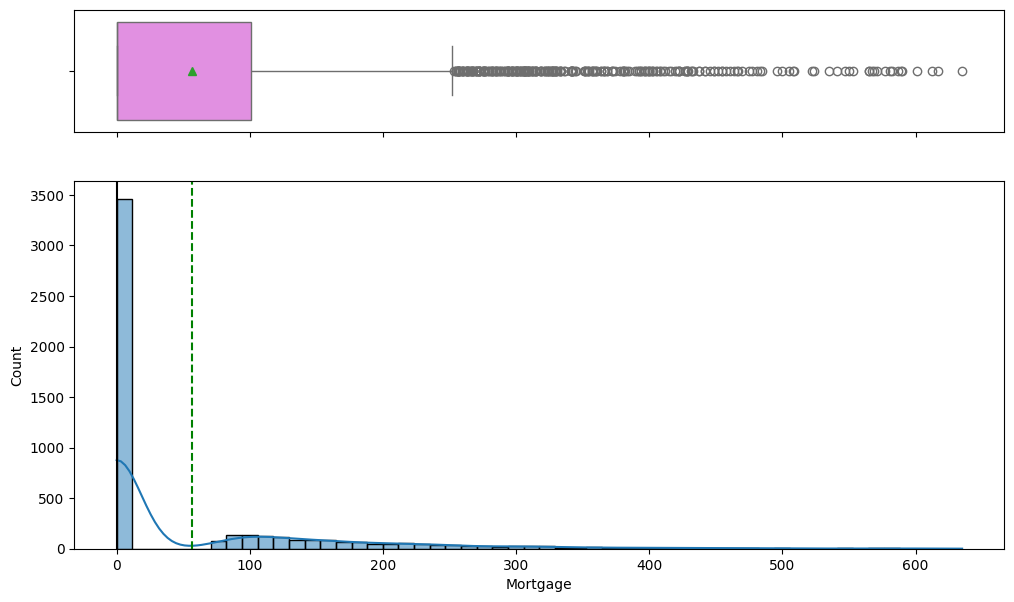

In [181]:
histogram_boxplot(df, 'Mortgage',kde=True)

**Observations**
* Mortgage distribution is right-skewed
* There are alot of high outliers
* significant portion of the customers do not hold mortgages.

**Will break the Mortgage to two groups, with and without Mortgage**

In [182]:
df_without_Mortgage = df[df['Mortgage'] == 0]
df_with_Mortgage = df[df['Mortgage'] != 0]

In [183]:
print(f'Number of customers without Mortgage: {len(df_without_Mortgage)}')
print(f'Number of customers with Mortgage: {len(df_with_Mortgage)}')

Number of customers without Mortgage: 3462
Number of customers with Mortgage: 1538


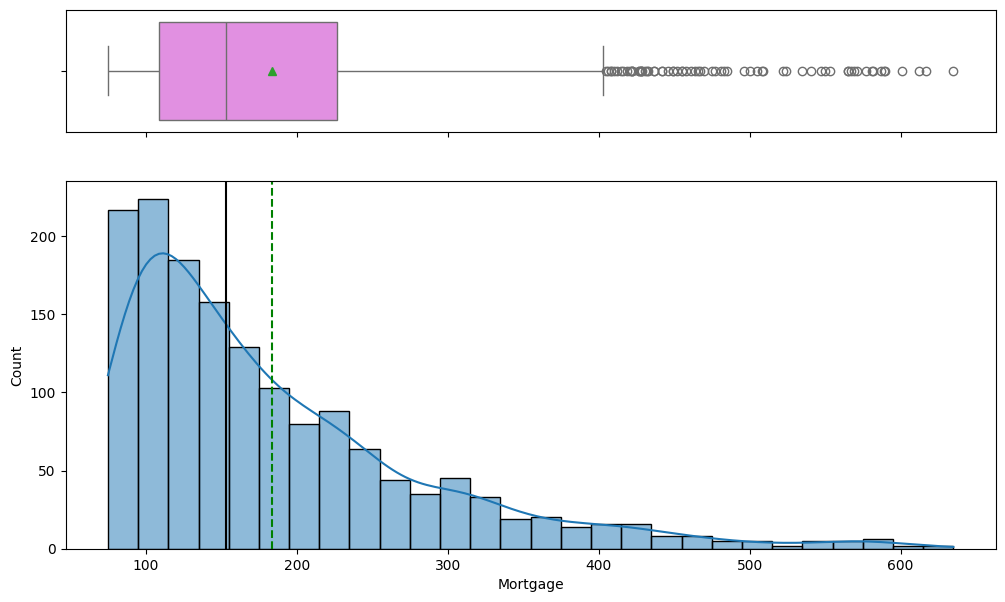

In [184]:
histogram_boxplot(df_with_Mortgage, 'Mortgage', kde=True)

**Observations**
* Mortgage distribution is right-skewed
* There are alot of high outliers
* significant portion of the customers do not hold mortgages.
* Number of customers without Mortgage: 3462
* Number of customers with Mortgage: 1538


#### Observations on Family

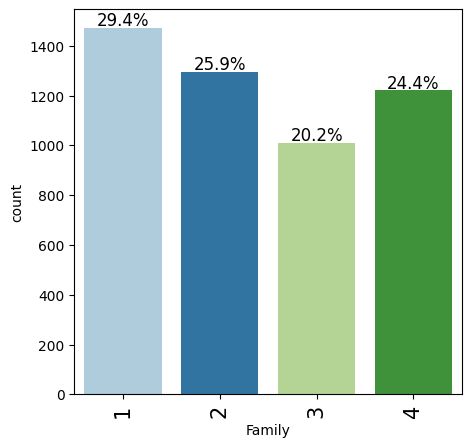

In [185]:
labeled_barplot(df, 'Family', perc=True)

In [186]:
df['Family'].value_counts(dropna=False)

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

**Observations**
* 29.4% of cutomers are single

#### Observations on Education

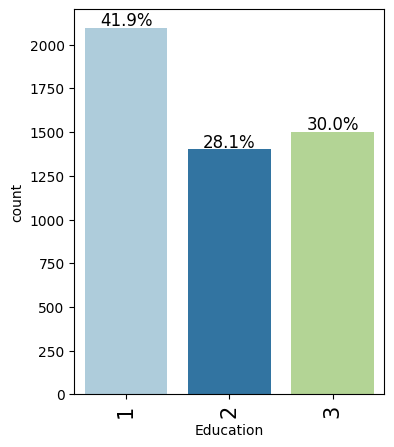

In [187]:
labeled_barplot(df, 'Education', perc=True)

**Observations**
* 41.9% of customers are Undergrad
* 30.0% of customers has Advanced/Professional education
* 28.1% of customers are graduates


#### Observations on Personal_Loan

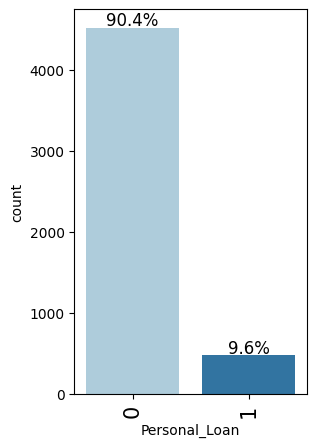

In [188]:
labeled_barplot(df, 'Personal_Loan', perc=True)

**Observations**
* 90.4% of customers did not accept the personal loan

#### Observations on Securities_Account

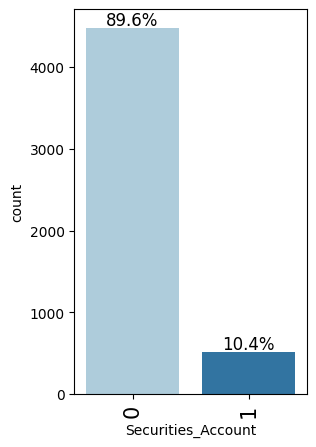

In [189]:
labeled_barplot(df, 'Securities_Account', perc=True)

* 89.6% of users does not have Securities_Account with the bank

#### Observations on CD_Account

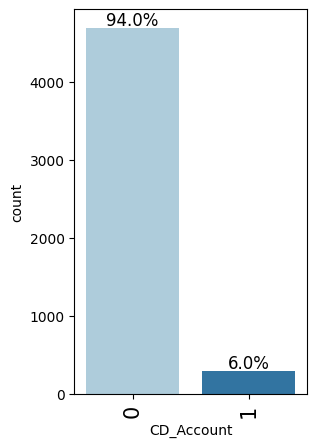

In [190]:
labeled_barplot(df, 'CD_Account', perc=True)

**Observations**
* 94% of customers does not have a certificate of deposit (CD)

#### Observations on Online

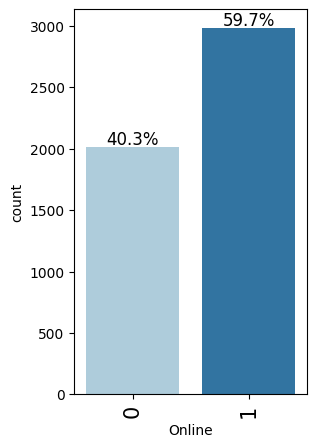

In [191]:
labeled_barplot(df, 'Online', perc=True)

**Observaations**
* 59.7% of customers does not use online banking

#### Observation on CreditCard

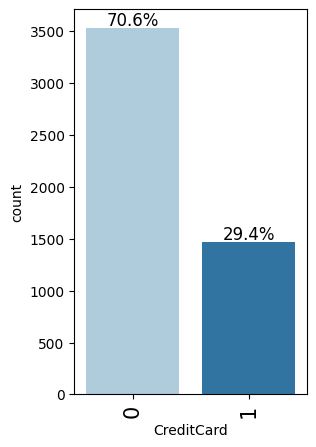

In [192]:
labeled_barplot(df, 'CreditCard', perc=True)

**Observations**
* 70.6% of customers does not use a credit card issued by any other Bank

#### Observation on ZIPCode

**For better visualizations will plot with both names and numbers for top 20 cities**

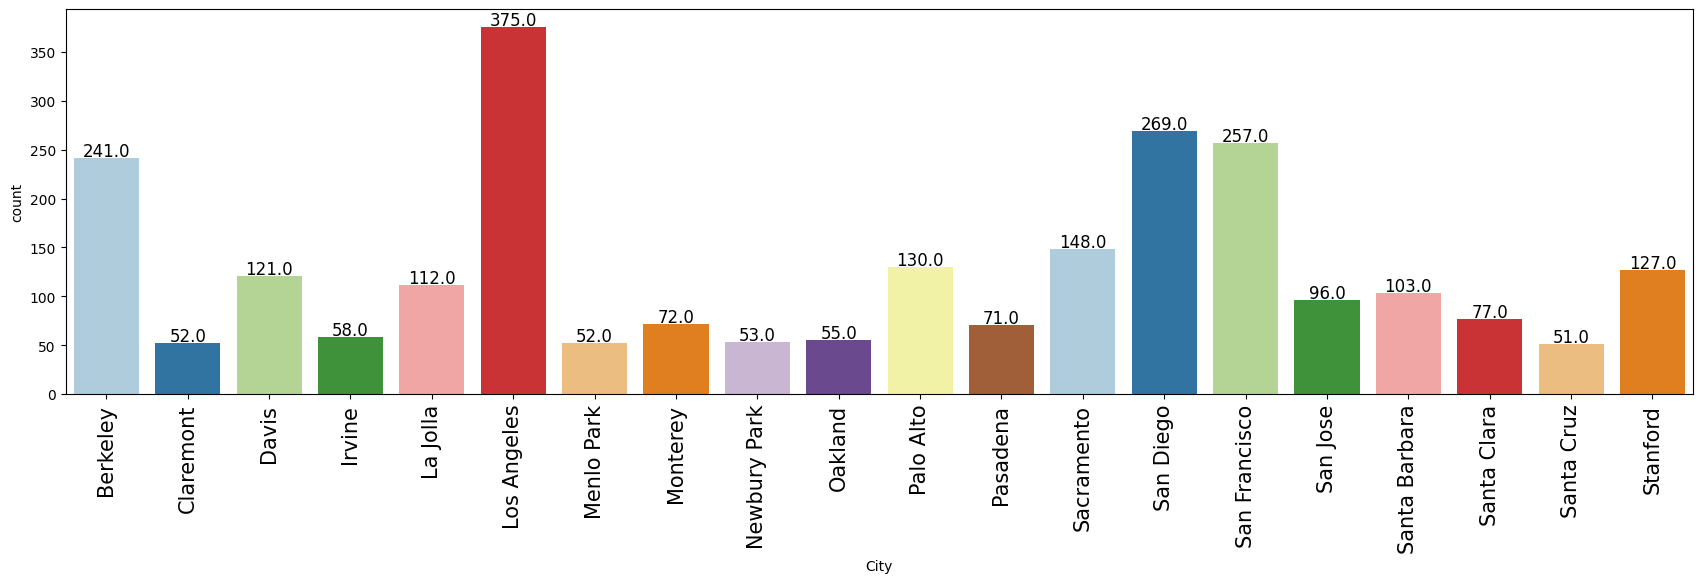

In [193]:
labeled_barplot(df_with_city_names, 'City', n = 20)

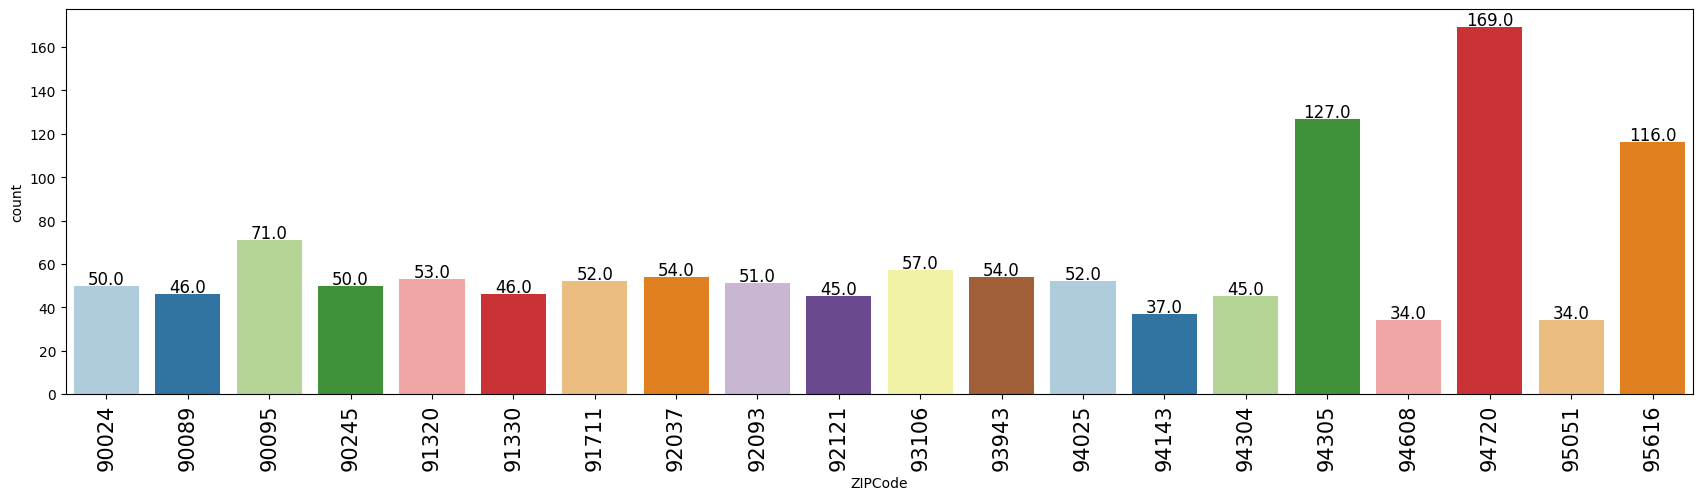

In [194]:
labeled_barplot(df, 'ZIPCode', n=20)


### Bivariate Analysis

* Functions for ploting

In [195]:
def stacked_barplot(data, predictor, target, kind=('bar', 'barh')):
    """
    Function to create a stacked bar plot of the predictor variable with respect to the target variable.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    predictor (str): The name of the predictor variable.
    target (str): The name of the target variable.
    kind (tuple): A tuple specifying the types of plots ('bar' for vertical bar plot, 'barh' for horizontal bar plot).
    """

    # Get the number of unique values in the predictor variable
    count = data[predictor].nunique()

    # Set the size of the plot based on the kind of plot
    size = 5 if kind == 'bar' else 10

    # Determine the sorter for sorting the cross-tabulation based on target value counts
    sorter = data[target].value_counts().index[-1]

    # Create a cross-tabulation of predictor vs target with margins, and sort by the sorter in descending order
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    # Print the cross-tabulation
    print(tab1)
    print("-" * 120)

    # Create a normalized cross-tabulation of predictor vs target and sort by the sorter in descending order
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot the normalized cross-tabulation as a stacked bar plot
    tab.plot(kind=kind, stacked=True, figsize=(count + 5, size))

    # Customize the legend position
    plt.legend(
        loc="lower left", frameon=False,  # Position the legend at the lower left and remove the frame
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust the legend position to the upper left outside the plot

    # Display the plot
    plt.show()


In [196]:
def distribution_plot_wrt_target(data, predictor, target):
    """
    Function to plot the distribution of a predictor variable with respect to a target variable.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    predictor (str): The name of the predictor variable.
    target (str): The name of the target variable.
    """

    # Create a 2x2 grid of subplots with specified figure size
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Get unique values of the target variable (assumed to be binary)
    target_uniq = data[target].unique()

    # Plot the distribution of the predictor for the first category of the target variable
    axs[0, 0].set_title("Distribution of target for Not accepted personal Loan")
    sns.histplot(
        data=data[data[target] == target_uniq[0]],  # Filter data for first category
        x=predictor,  # Specify the predictor variable
        kde=True,  # Include Kernel Density Estimate
        ax=axs[0, 0],  # Plot in the first subplot
        color="teal",  # Set color for the plot
        stat="density",  # Plot density instead of count
    )

    # Plot the distribution of the predictor for the second category of the target variable
    axs[0, 1].set_title("Distribution of target for accepted personal loan")
    sns.histplot(
        data=data[data[target] == target_uniq[1]],  # Filter data for second category
        x=predictor,  # Specify the predictor variable
        kde=True,  # Include Kernel Density Estimate
        ax=axs[0, 1],  # Plot in the second subplot
        color="orange",  # Set color for the plot
        stat="density",  # Plot density instead of count
    )

    # Plot a boxplot of the predictor variable grouped by the target variable
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,  # Use the entire dataset
        x=target,  # Specify the target variable for the x-axis
        y=predictor,  # Specify the predictor variable for the y-axis
        ax=axs[1, 0],  # Plot in the third subplot
        palette="gist_rainbow",  # Set color palette
    )

    # Plot a boxplot of the predictor variable grouped by the target variable, excluding outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,  # Use the entire dataset
        x=target,  # Specify the target variable for the x-axis
        y=predictor,  # Specify the predictor variable for the y-axis
        ax=axs[1, 1],  # Plot in the fourth subplot
        showfliers=False,  # Exclude outliers from the plot
        palette="gist_rainbow",  # Set color palette
    )

    # Adjust layout to prevent overlapping of subplots and labels
    plt.tight_layout()

    # Display the plots
    plt.show()


#### Correlation check

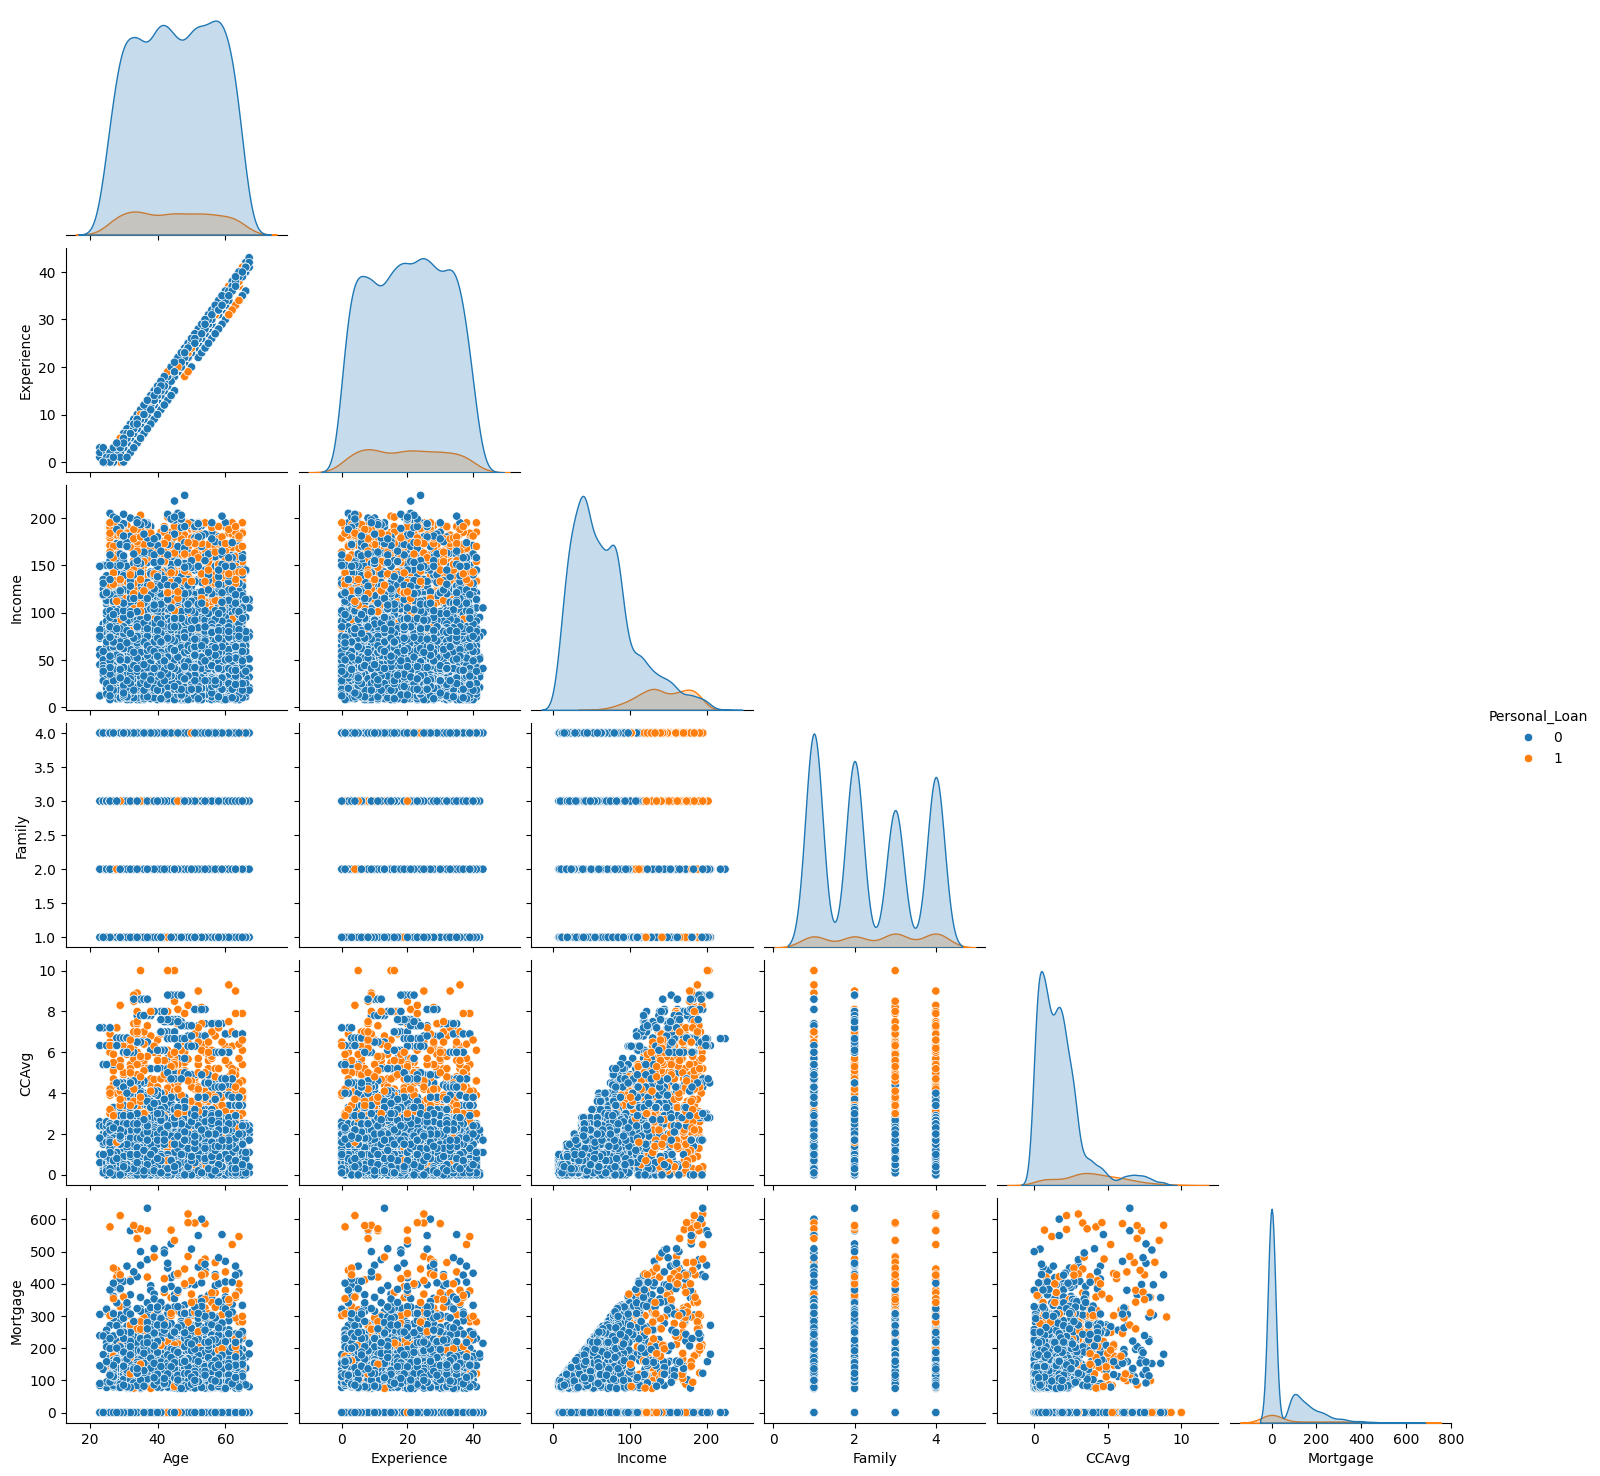

In [197]:
sns.pairplot(df, hue='Personal_Loan', corner=True)
plt.show()

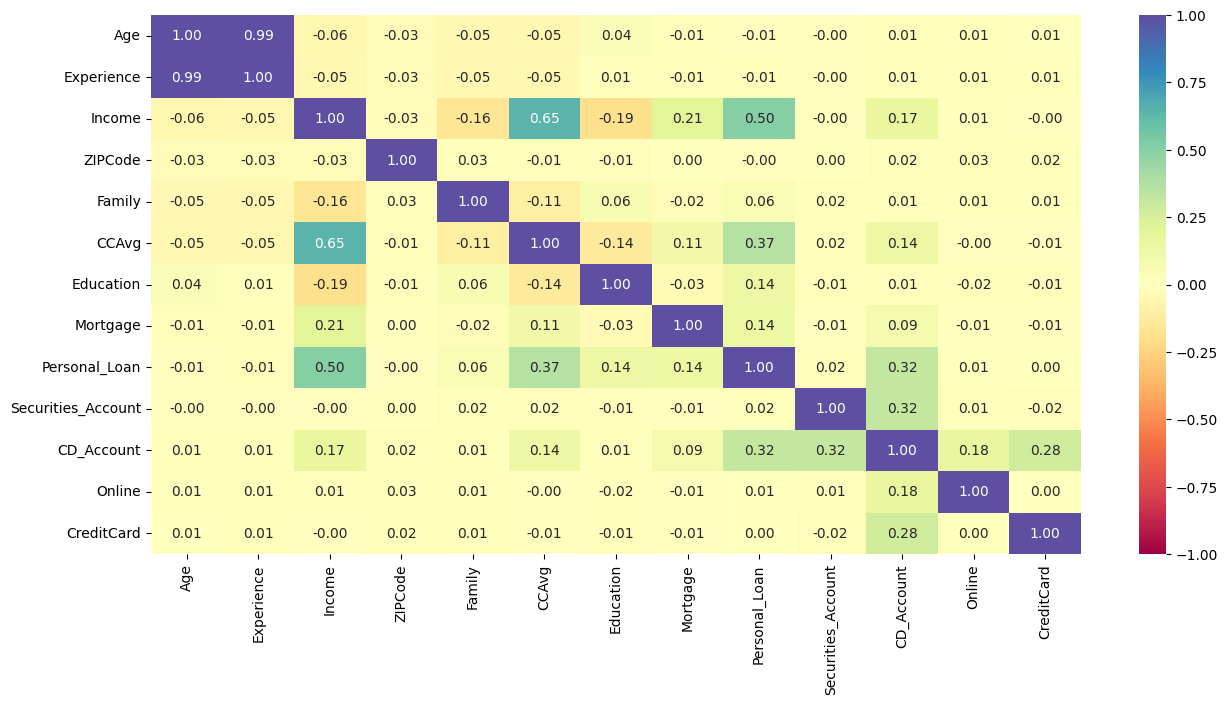

In [198]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr()  ,annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
* The correlation between Age and Experience 0.99 which make sense
* The correlation between Income and CCAvg 0.65
* The correlation between Personal_Loan and Income is 0.50
* The correlation between Personal_Loan and CCAvg is 0.37
* The correlation between Personal_Loan and CD_Accounbt is 0.32

**Ploting target vs numerical values**

#### Age vs Personal Loan

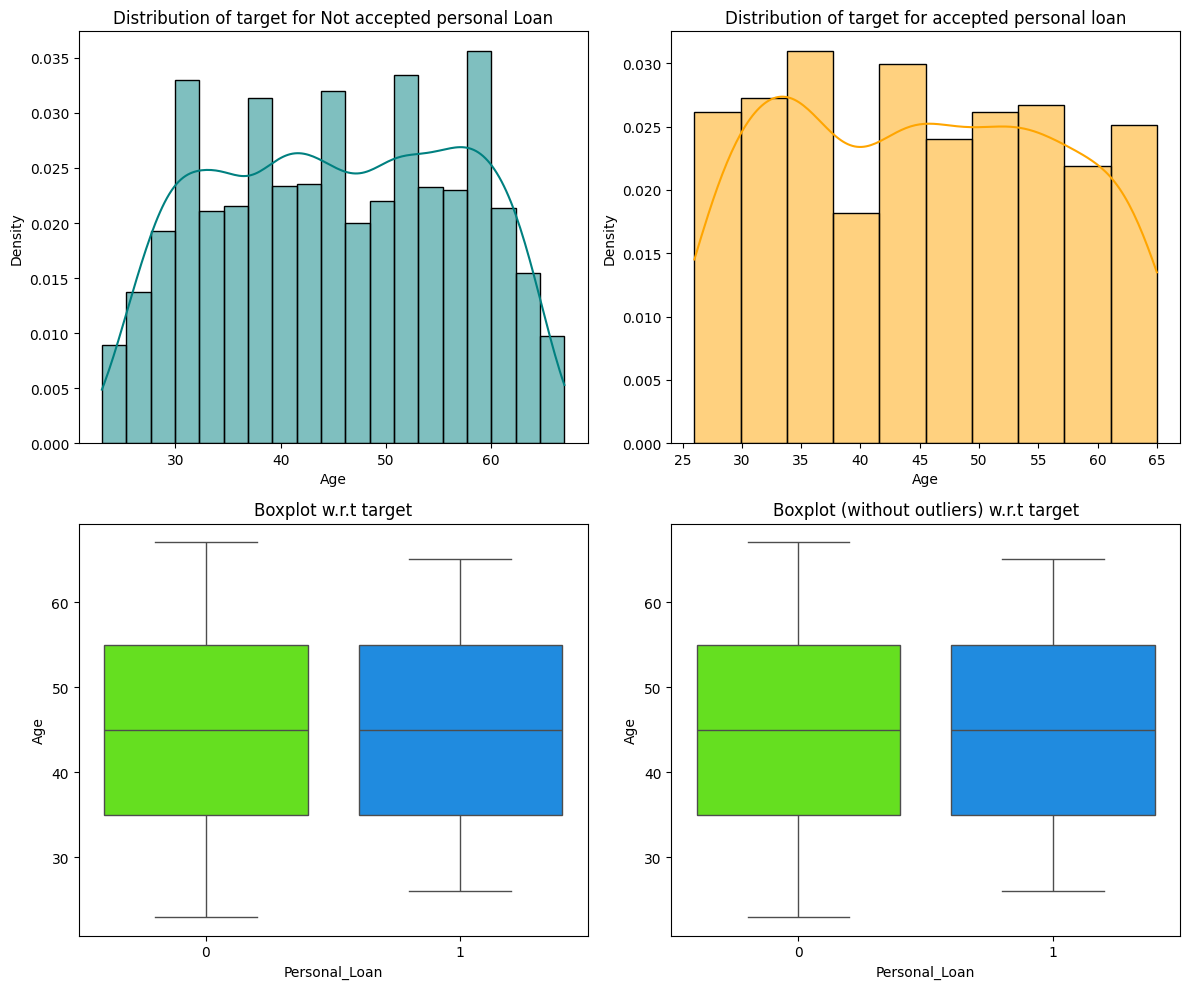

In [199]:
distribution_plot_wrt_target(df, 'Age', 'Personal_Loan')

**Observations**
* Median in is around 45 for the clients whom accepted the personal loand and whome not.
* No outliers observed
* As we observed in the heatmap and the pairplot, a relationship is not evident.

#### Experience vs Personal Loan

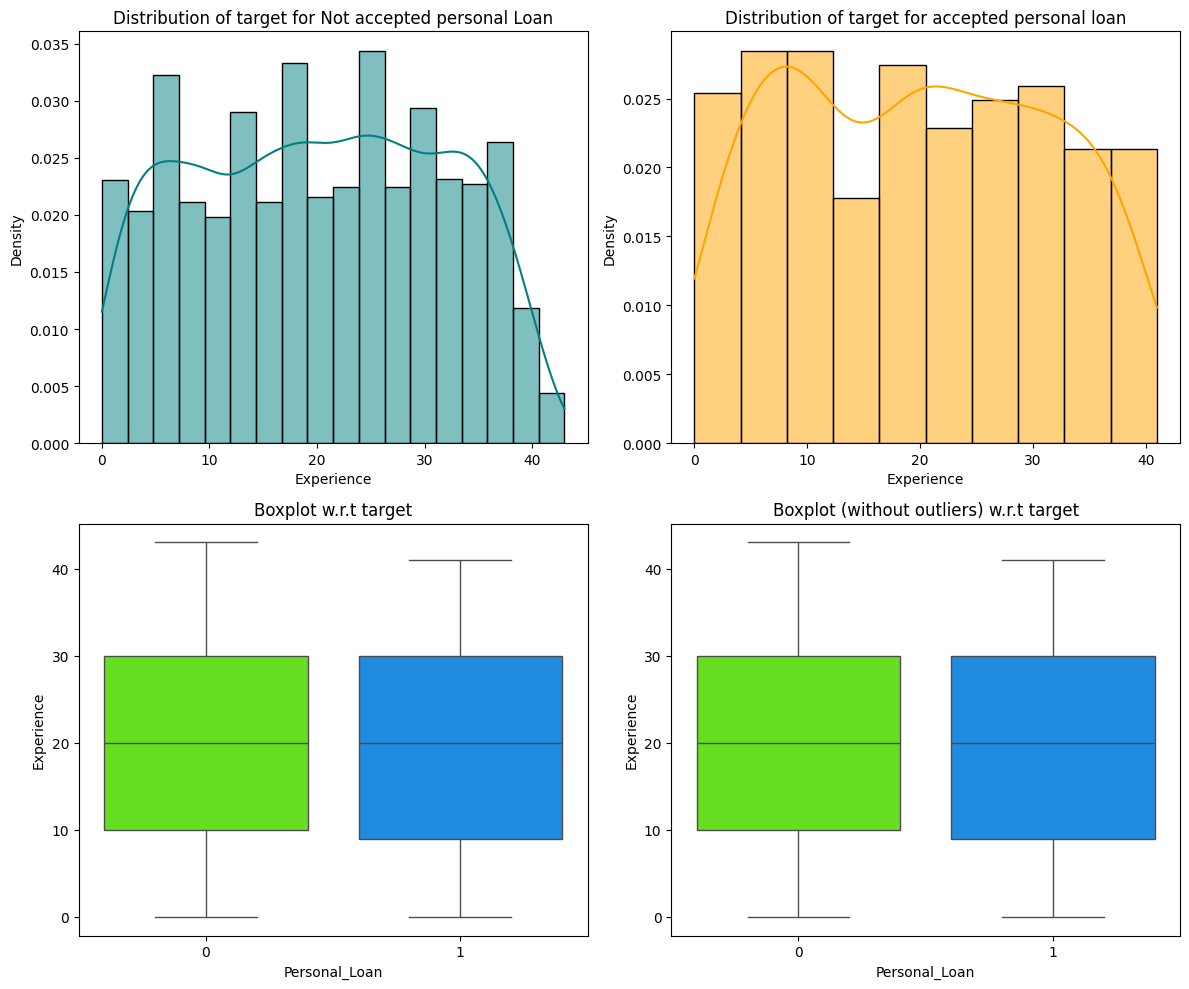

In [200]:
distribution_plot_wrt_target(df,'Experience','Personal_Loan')

**Observations**
* The Medina for both who accepted or not is around 20
* No outliers observed
* As we observed in the heatmap and the pairplot, a relationship is not evident.

#### Income vs Personal Loan

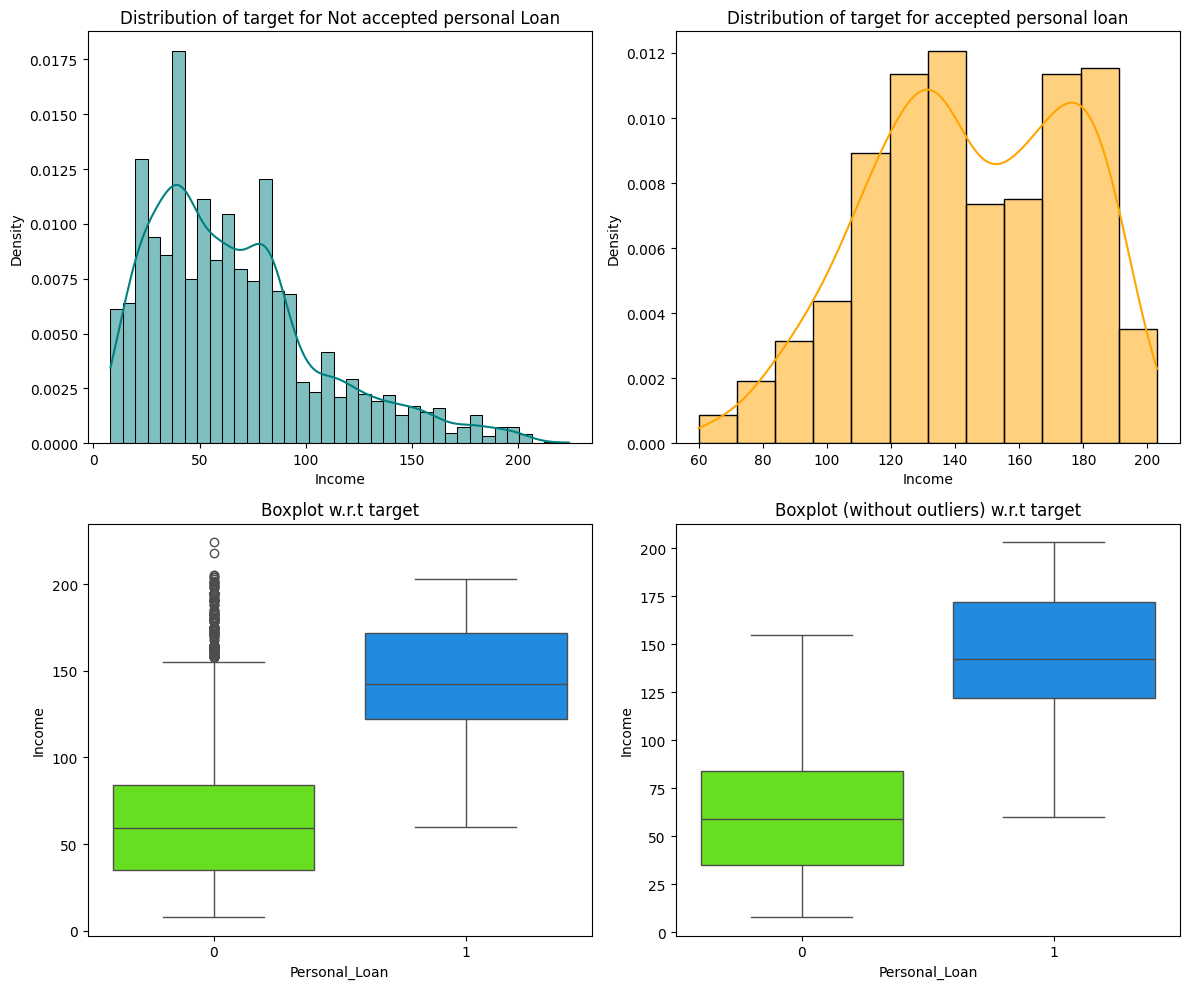

In [201]:
distribution_plot_wrt_target(df,'Income','Personal_Loan')

**Observaations**
* Median in customers who accepted the personal loan is far higher than the median of the customers did not accept the personal loan
* There are outliers in clients who does not accepted the personal loan
* A pattern can be observed that higher income will increase the chance of accepting the personal loan

#### Average spending on credit cards per month(CCAvg) vs Personal Loan

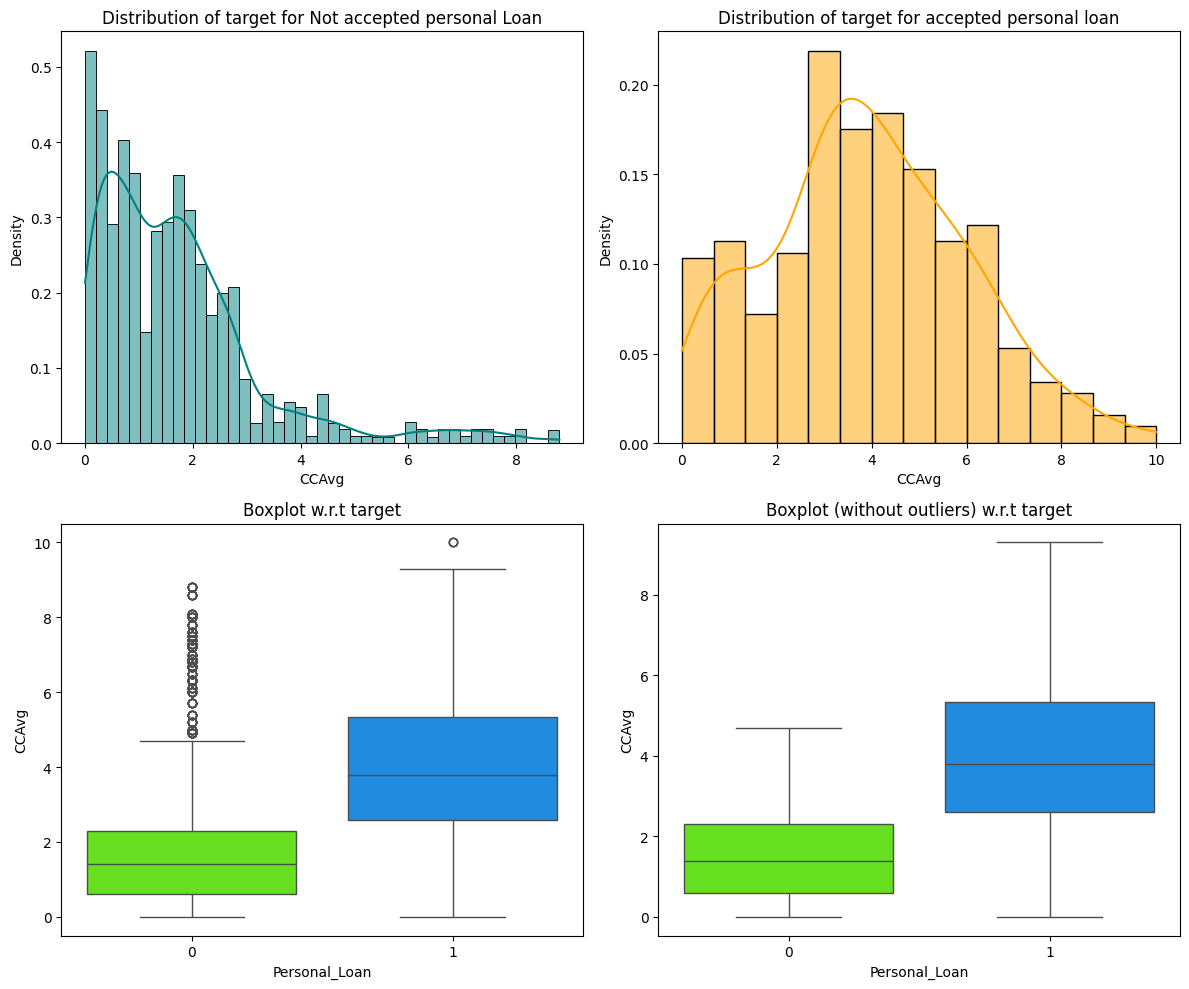

In [202]:
distribution_plot_wrt_target(df,'CCAvg','Personal_Loan')

**Observations**
* It is observed that customers spend more money on credit card more accept the personal loan
* The median in accepted is higher that not accepted
* There are outliers in uses who does not accept the personal loan


#### Mortgage vs Personal Loan

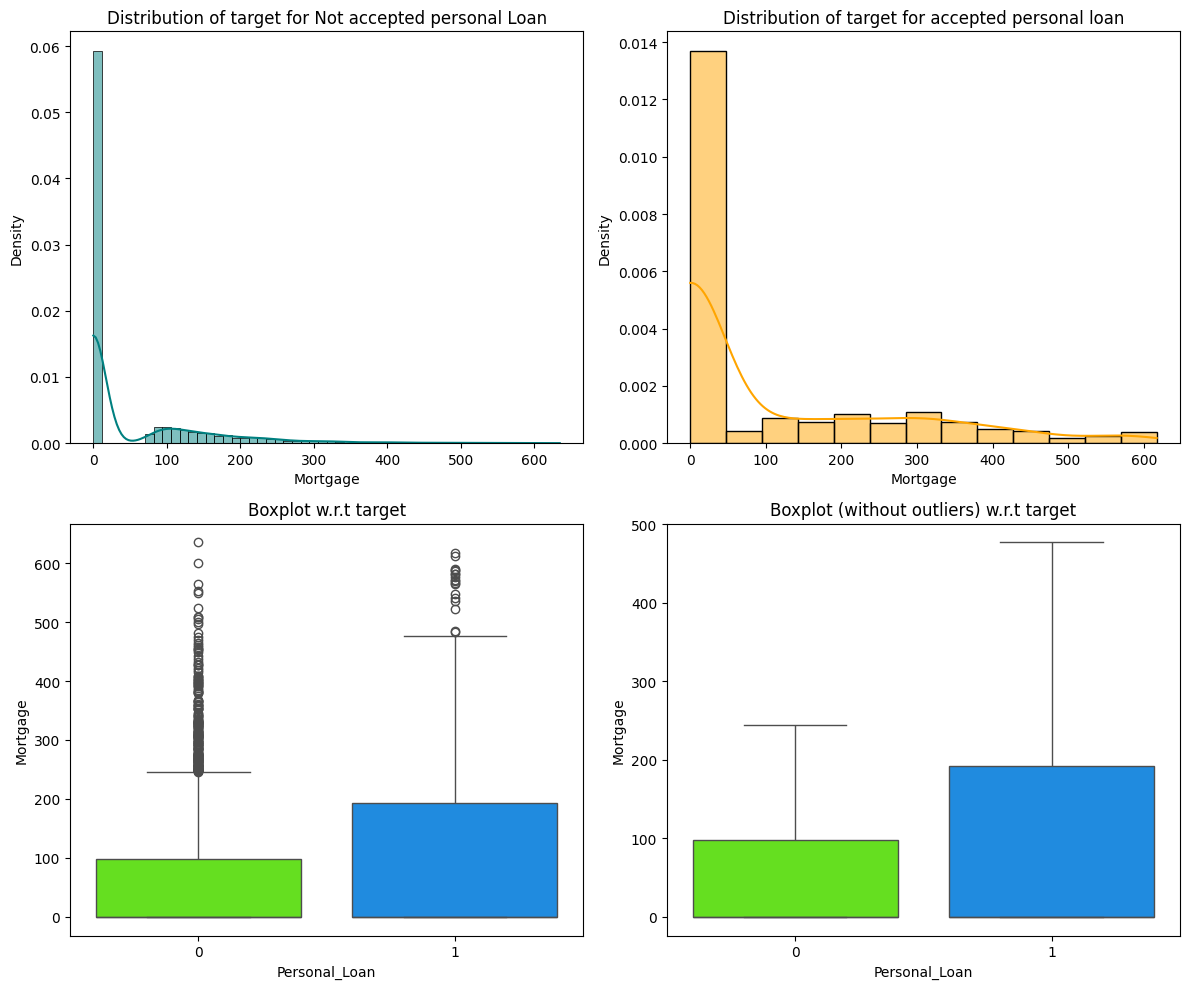

In [203]:
distribution_plot_wrt_target(df,'Mortgage','Personal_Loan')

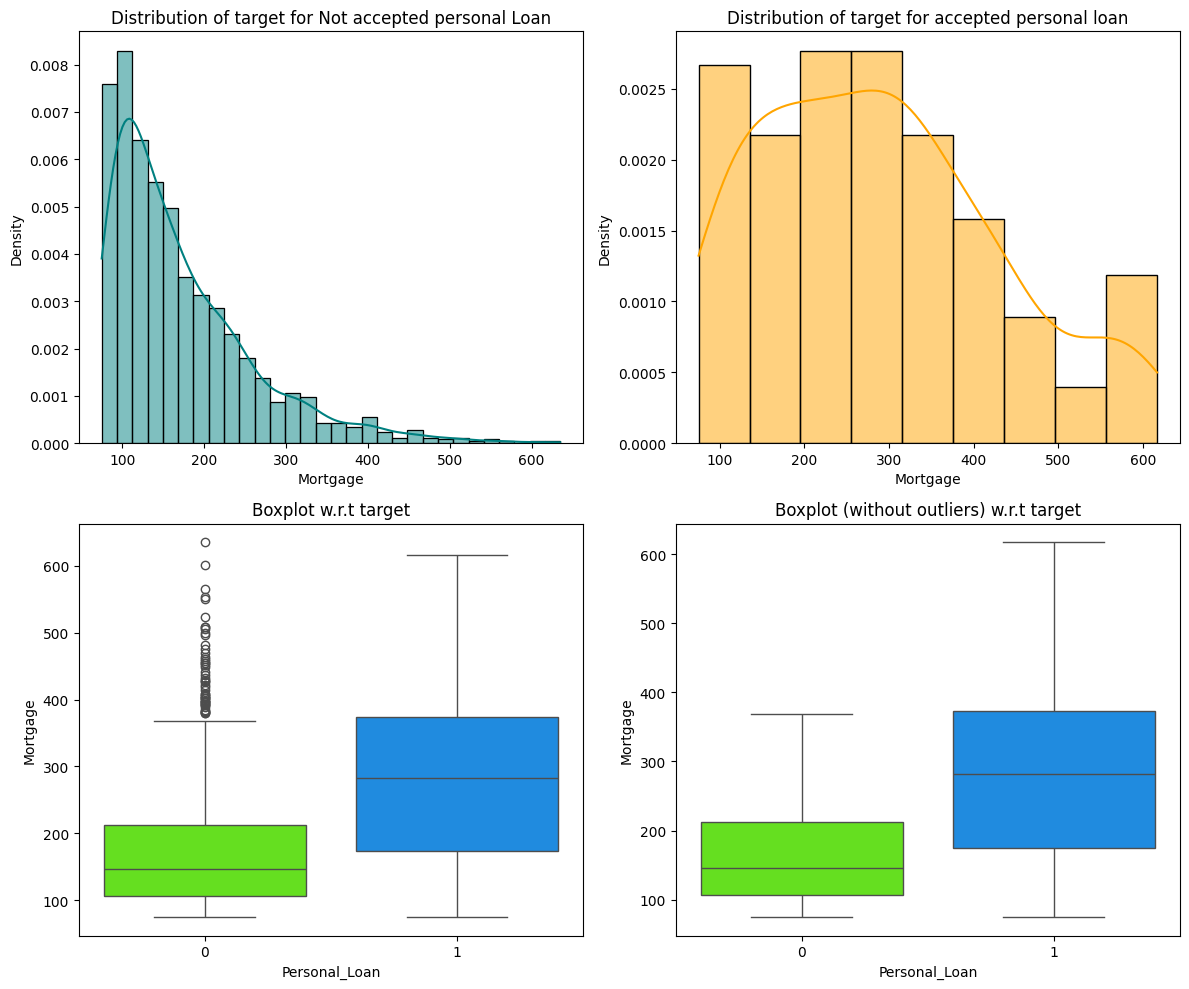

In [204]:
distribution_plot_wrt_target(df_with_Mortgage,'Mortgage','Personal_Loan')

**Observations**
* It is observed that customers have more Mortgage more accept the personal loan
* The median in accepted is higher that not accepted
* There are outliers in uses who does not accept the personal loan

#### City and ZIPCode vs Personal_Loan

Personal_Loan        0    1   All
City                             
All               4520  480  5000
Other             1770  189  1959
Los Angeles        337   38   375
Berkeley           214   27   241
San Diego          248   21   269
San Francisco      238   19   257
Palo Alto          114   16   130
La Jolla            97   15   112
Stanford           114   13   127
Sacramento         135   13   148
Santa Clara         65   12    77
San Jose            85   11    96
Pasadena            61   10    71
Irvine              50    8    58
Santa Barbara       95    8   103
Santa Cruz          44    7    51
Davis              115    6   121
Los Altos           30    6    36
Monterey            66    6    72
San Luis Obispo     28    5    33
Oakland             50    5    55
El Segundo          45    5    50
Huntington Beach    30    5    35
Claremont           48    4    52
Fallbrook           28    4    32
Menlo Park          48    4    52
Riverside           42    4    46
Hayward       

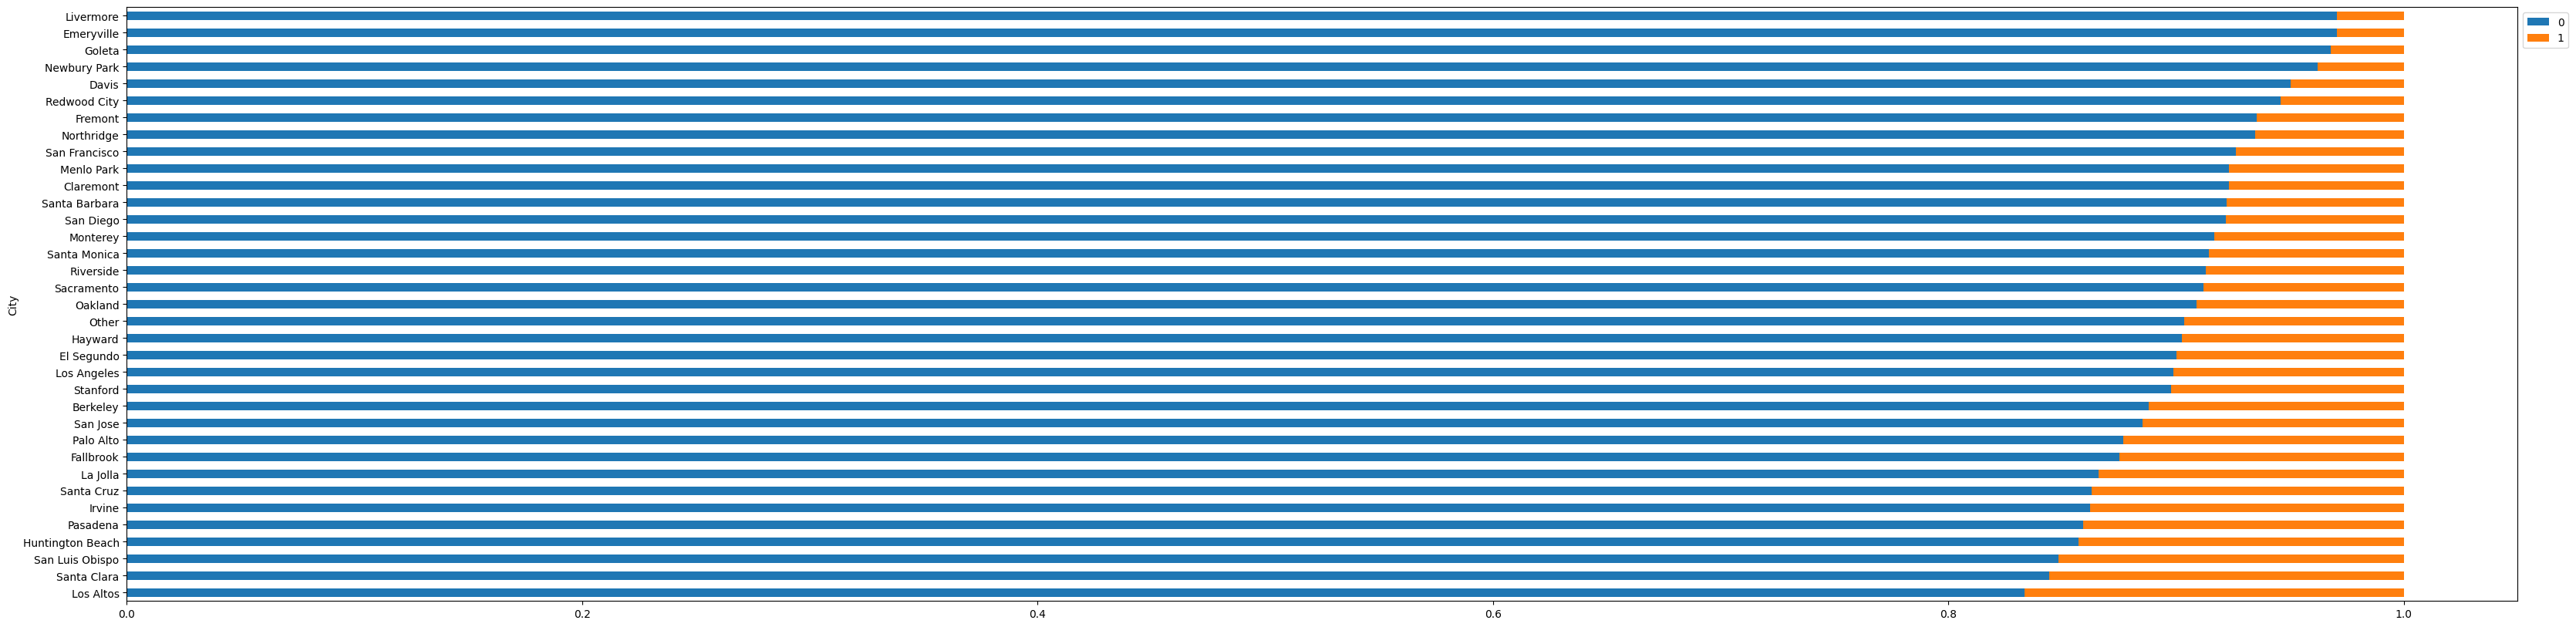

In [205]:
# Count the occurrences of each city in the 'City' column of the DataFrame
cities = df_with_city_names['City'].value_counts()

# Identify the top 30 cities that have 30 or more occurrences
top_30_cities = cities[cities.values >= 30].index.tolist()

# Create a copy of the original DataFrame to modify for plotting
df_top_30_cities_with_other = df_with_city_names.copy()

# Replace city names that are not in the top 30 with 'Other'
df_top_30_cities_with_other['City'] = df_with_city_names['City'].apply(
    lambda x: 'Other' if x not in top_30_cities else x
)

# Call the stacked_barplot function to create a stacked bar plot
# of the 'City' predictor variable against the 'Personal_Loan' target variable
# Use a horizontal bar plot ('barh') for visualization
stacked_barplot(df_top_30_cities_with_other, "City", "Personal_Loan", kind="barh")


Personal_Loan     0    1   All
ZIPCode                       
All            1383  153  1536
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
94304            37    8    45
90089            38    8    46
92182            25    7    32
95616           110    6   116
95051            28    6    34
90245            45    5    50
95814            25    5    30
95054            26    5    31
92037            49    5    54
94025            48    4    52
95014            25    4    29
93943            50    4    54
93407            22    4    26
93106            53    4    57
92028            28    4    32
91711            48    4    52
94143            34    3    37
94542            24    3    27
92521            29    3    32
92121            42    3    45
91330            43    3    46
94301            25    2    27
91320            51    2    53
94608            33    1    34
90024            49    1    50
94550   

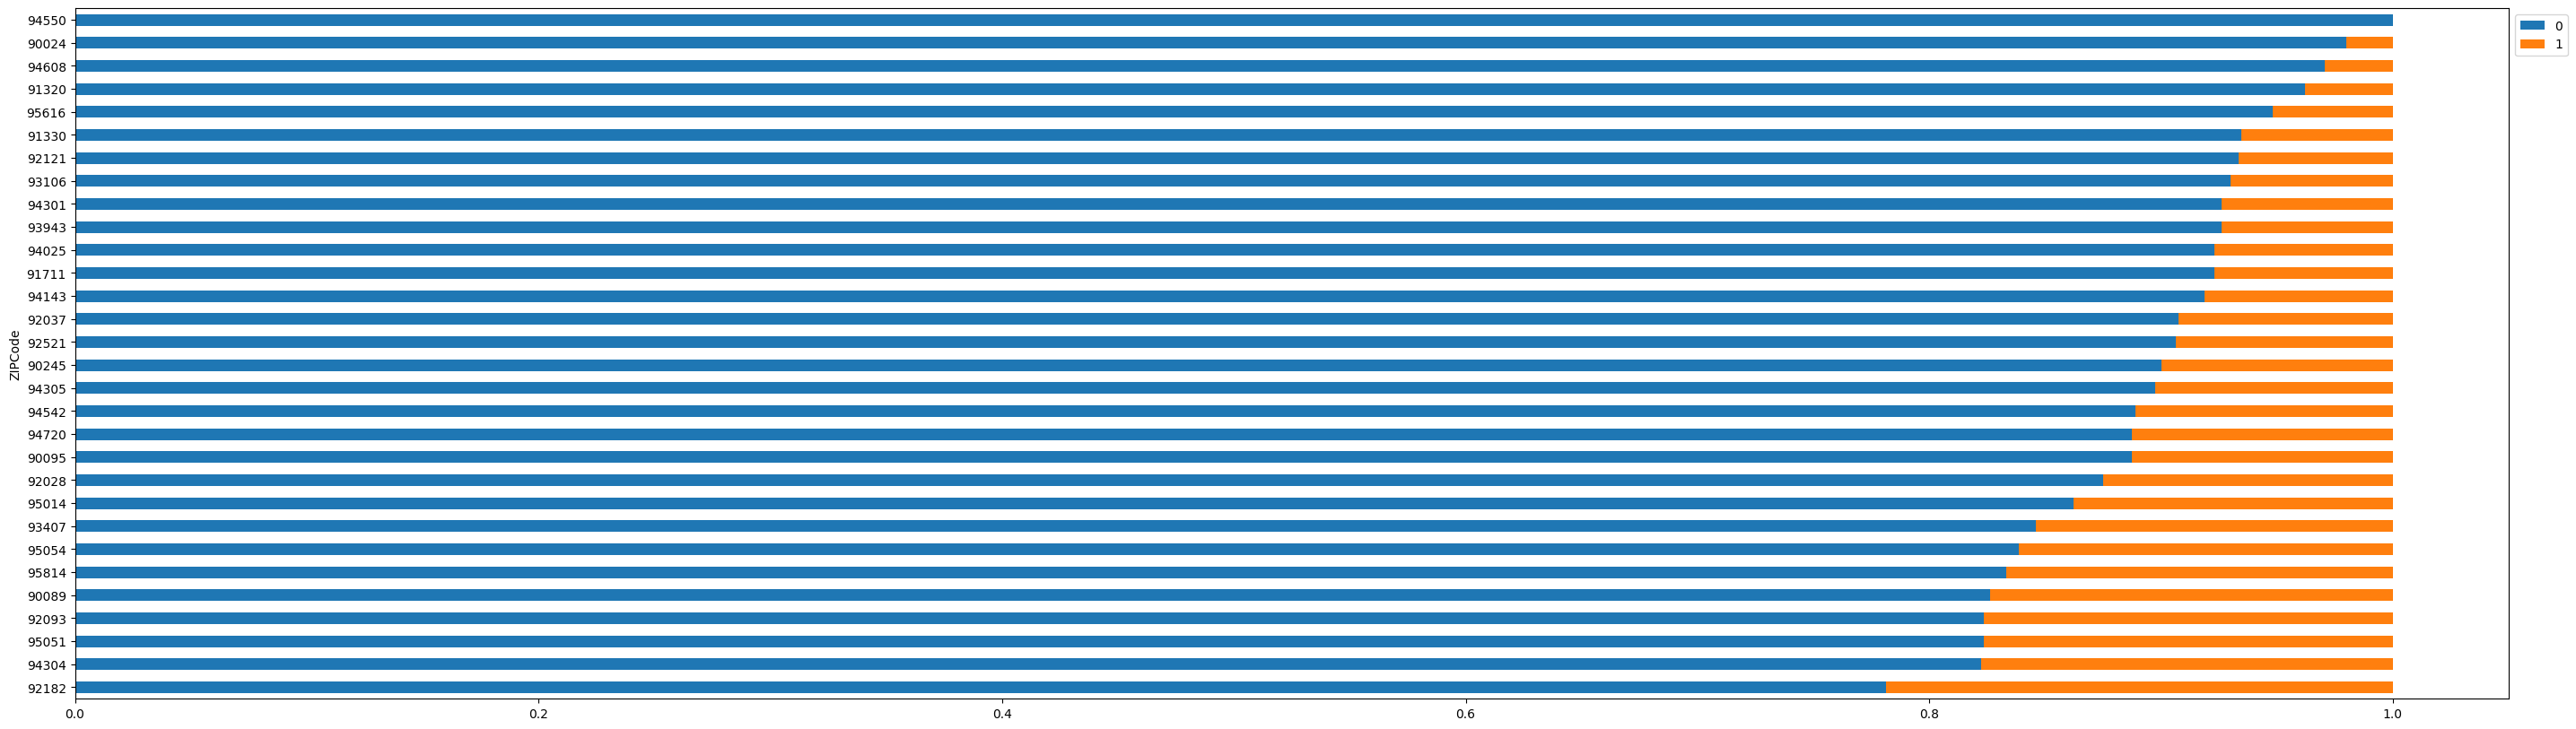

In [206]:
top_30_zipcodes = df['ZIPCode'].value_counts().head(30).index
df_top_30_zipcodes = df[df['ZIPCode'].isin(top_30_zipcodes)]
stacked_barplot(df_top_30_zipcodes, "ZIPCode", "Personal_Loan", kind='barh')

**Observations**
* It is observed that Los Altos has the greatest ratio on accepting the personal loand followed by Santa Clara and San Luis Obsipo

#### Family vs Personal_Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


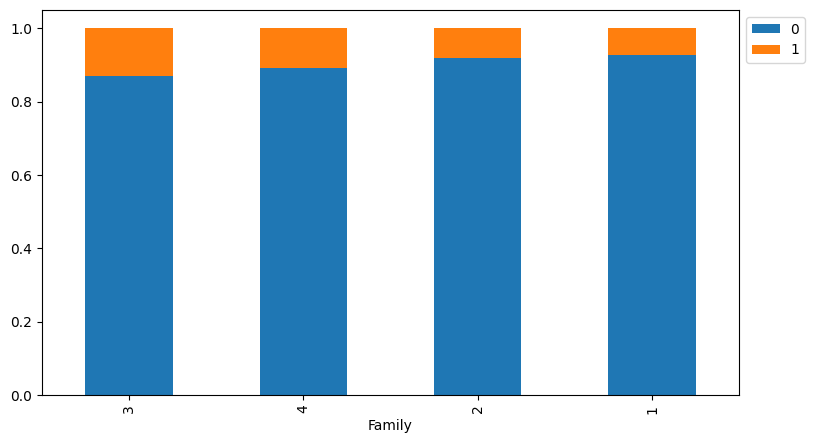

In [207]:
stacked_barplot(df, 'Family', 'Personal_Loan', kind='bar')

**Observations**
* Family with size of 3 persons are more accepting the personal loan followed by falmiy size of 4
* Families with size of 1 and 2 are almost the same in number of accepting personal loan

#### Education vs Personal_Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


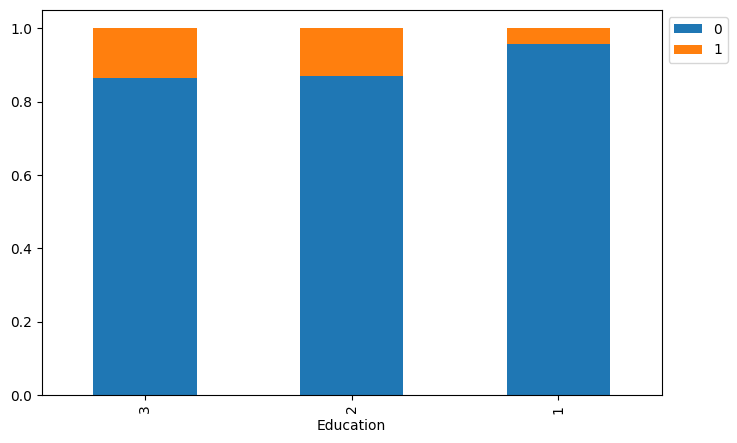

In [208]:
stacked_barplot(df, 'Education', 'Personal_Loan', kind='bar')

**Observations**
* It is observed that customers with education level 3 and 2 are more willing to accept a personal loan compare to  education level 1.

#### Security_Account vs Personal_Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


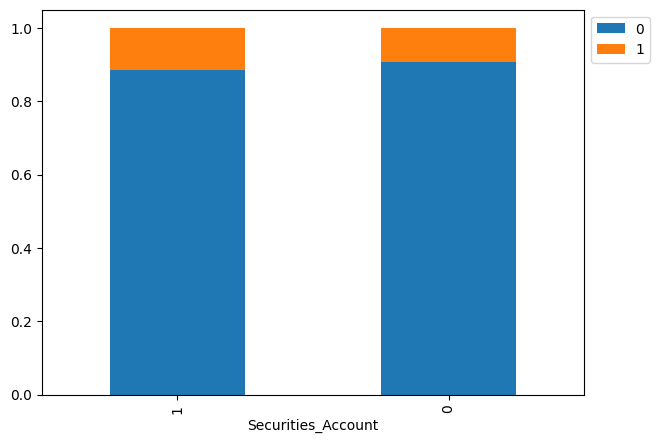

In [209]:
stacked_barplot(df, 'Securities_Account', 'Personal_Loan', kind='bar')

**Observations**
* Customers with security account slightly more willing to accept the personal loan

#### CD_Account VS Personal_Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


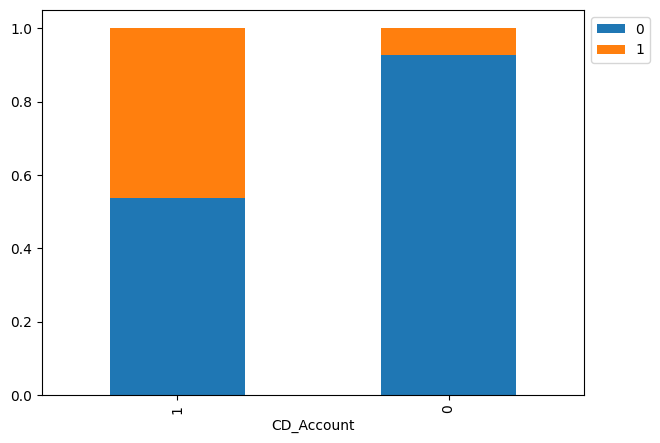

In [210]:
stacked_barplot(df, 'CD_Account', 'Personal_Loan', kind='bar')

**Observations**
* It is observed that customers with certificate of deposit (CD) account more accepitng the personal loan.

#### Online VS Personal_Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


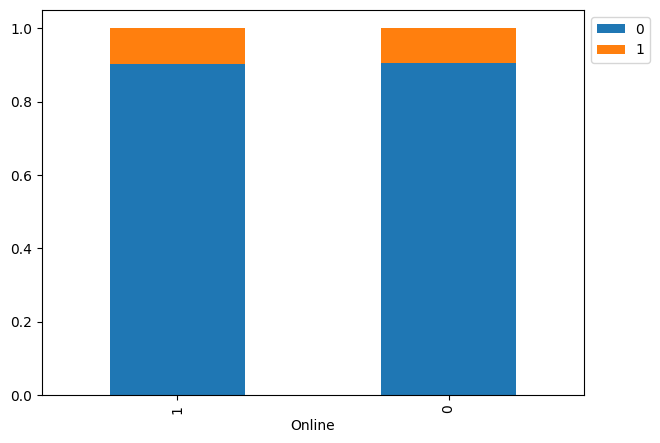

In [211]:
stacked_barplot(df, 'Online', 'Personal_Loan', kind='bar')

**Observatrions**
* Customers with online and without online account seems to have almost the same rate on accepting the personal loan

#### CreditCard  VS Personal_Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


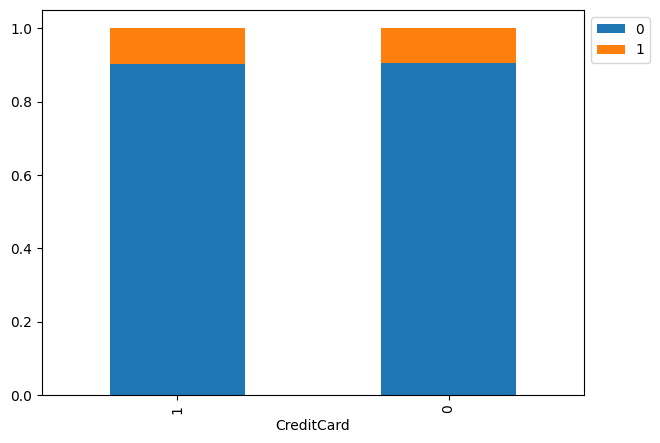

In [212]:
stacked_barplot(df, 'CreditCard', 'Personal_Loan', kind='bar')

**Observatrions**
* Customers with other banks credit cards and without other banks credit cards seems to have almost the same rate on accepting the personal loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### Outlier detection

In [213]:
# Calculate the first quartile (25th percentile) of each column in the DataFrame
Q1 = data.quantile(0.25)

# Calculate the third quartile (75th percentile) of each column in the DataFrame
Q3 = data.quantile(0.75)

# Calculate the Interquartile Range (IQR) for each column
IQR = Q3 - Q1

# Calculate the lower bound for outliers for each column
lower = Q1 - 1.5 * IQR

# Calculate the upper bound for outliers for each column
upper = Q3 + 1.5 * IQR


In [214]:
# Select only the columns of type float64 and int64 from the DataFrame
numeric_data = data.select_dtypes(include=["float64", "int64"])

# Create a boolean DataFrame where each cell is True if the corresponding cell in 'numeric_data' is an outlier
outliers = (numeric_data < lower) | (numeric_data > upper)

# Calculate the sum of True values (outliers) in each column, then divide by the total number of rows
# to get the percentage of outliers in each column
outlier_percentage = outliers.sum() / len(data) * 100

# Display the percentage of outliers in each numeric column
outlier_percentage


ID                     0.00
Age                    0.00
Experience             0.00
Income                 1.92
ZIPCode                0.00
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

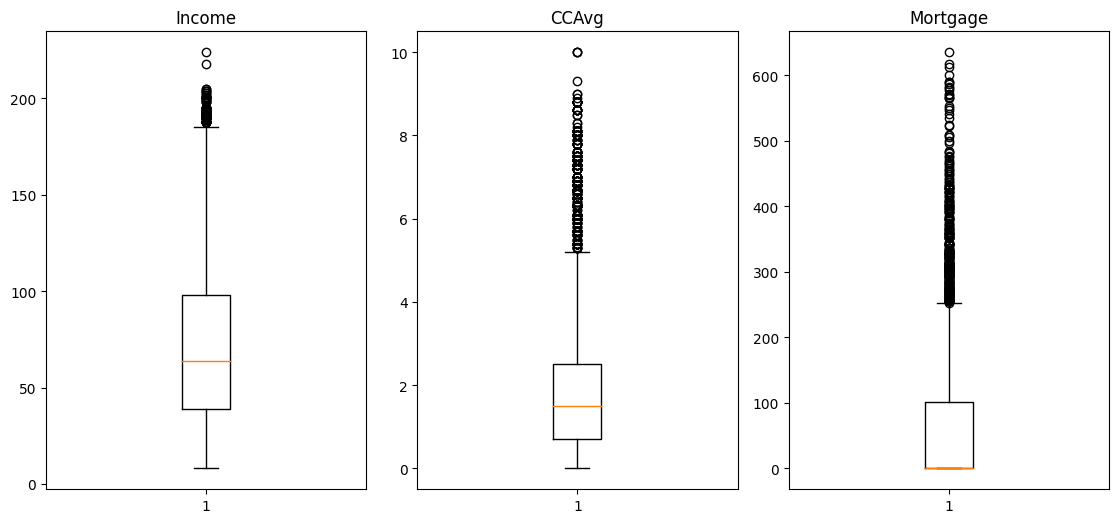

In [215]:
# Specify the columns for which to create boxplots
columns = ['Income', 'CCAvg', 'Mortgage']

# Create a new figure for the plots with a specified size
plt.figure(figsize=(15, 20))

# Loop through the list of columns and create a boxplot for each
for i, variable in enumerate(columns):
    # Create a subplot for each boxplot (4 rows, 4 columns, current plot index + 1)
    plt.subplot(4, 4, i + 1)

    # Create a boxplot for the current variable with whiskers set to 1.5 times the IQR
    plt.boxplot(df[variable], whis=1.5)

    # Adjust layout to ensure that subplots fit into the figure area without overlap
    plt.tight_layout()

    # Set the title of the current subplot to the name of the variable
    plt.title(variable)

# Display the boxplots
plt.show()


* There are outliers in the data.
* However, we will not treat them as they are proper values

#### Treating Invalid ZIPCodes and adding city and state to the df and droping ZIPCode column

In [216]:
# Creating a searchengin
sr = SearchEngine()
# Iterate over each row in df['ZIPCode'] to check if any invalid zip code is present will add None for the invalid zipcodes
for i, zip_code in enumerate(df['ZIPCode']):
    try:

        # Update DataFrame with results
        df.loc[i, 'City'] = sr.by_zipcode(zip_code).major_city
        df.loc[i, 'State'] = sr.by_zipcode(zip_code).state
        df.loc[i, 'County'] = sr.by_zipcode(zip_code).county
    except Exception as e:
        df.loc[i, 'City'] = None
        df.loc[i, 'State'] = None
        df.loc[i, 'County'] = None

There are 244 unique valid city and there are 34 rows with not accurate zip code after searching(https://www.smarty.com/articles/zip-4-code) find out the first three digits for these are valid and we can use that as unique values for zip codes. Will keep the three unique digits and will convert to a categorical data.
927 = Santa Ana
966 = Military
926 = Santa Ana
930 = Ventura

In [217]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first three digits of ZIPCode: ",
    df["ZIPCode"].str[0:3].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:3]

df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique values if we take first three digits of ZIPCode:  57


#### Chagne City, State and county type to category

In [218]:
#  Converting the data type of categorical features to 'category'
df['City'] = df['City'].astype('category')
df['State'] = df['State'].astype('category')
df['County'] = df['County'].astype('category')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  City                4966 non-null   category
 14  State               4966 non-null   category
 15  County              4966 non-null   ca

**Will drop rows with invalid zip code as they are only 34 columns**

In [220]:
df.dropna(inplace=True)

In [221]:
df.shape

(4966, 16)

#### Creatring categorical data

#### Droping columns

In [222]:
df.drop([ 'ZIPCode', 'County'], axis=1, inplace=True)

#### Data prepration for the model

In [223]:
# dropping Experience as it is perfectly correlated with Age
X = df.drop(["Personal_Loan", "Experience"] , axis=1)
y = df['Personal_Loan']

# Encode categorical columns 'State', 'Education', and 'City' using one-hot encoding
# Drop the first dummy variable for each category to avoid the dummy variable trap
X = pd.get_dummies(X, columns=['State','Education', 'City' ], drop_first=True)

# Split the data into training and testing sets (70% for training, 30% for testing)
# with a random state of 1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [224]:
X.head()

Age  Income  Family  CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25      49       4    1.6         0                  1          0      0   
1   45      34       3    1.5         0                  1          0      0   
2   39      11       1    1.0         0                  0          0      0   
3   35     100       1    2.7         0                  0          0      0   
4   35      45       4    1.0         0                  0          0      0   

  CreditCard  Education_2  Education_3  City_Alameda  City_Alamo  City_Albany  \
0          0        False        False         False       False        False   
1          0        False        False         False       False        False   
2          0        False        False         False       False        False   
3          0         True        False         False       False        False   
4          1         True        False         False       False        False   

   City_Alhambra  City_Anaheim  City_Antioch  City_Aptos  City_Arcadia  \
0          False         False         False       False         False   
1          False         False         False       False         False   
2          False         False         False       False         False   
3          False         False         False       False         False   
4          False         False         False       False         False   

   City_Arcata  City_Bakersfield  City_Baldwin Park  City_Banning  \
0        False             False              False         False   
1        False             False              False         False   
2        False             False              False         False   
3        False             False              False         False   
4        False             False              False         False   

   City_Bella Vista  City_Belmont  City_Belvedere Tiburon  City_Ben Lomond  \
0             False         False                   False            False   
1             False         False                   False            False   
2             False         False                   False            False   
3             False         False                   False            False   
4             False         False                   False            False   

   City_Berkeley  City_Beverly Hills  City_Bodega Bay  City_Bonita  \
0          False               False            False        False   
1          False               False            False        False   
2           True               False            False        False   
3          False               False            False        False   
4          False               False            False        False   

   City_Boulder Creek  City_Brea  City_Brisbane  City_Burlingame  \
0               False      False          False            False   
1               False      False          False            False   
2               False      False          False            False   
3               False      False          False            False   
4               False      False          False            False   

   City_Calabasas  City_Camarillo  City_Campbell  City_Canoga Park  \
0           False           False          False             False   
1           False           False          False             False   
2           False           False          False             False   
3           False           False          False             False   
4           False           False          False             False   

   City_Capistrano Beach  City_Capitola  City_Cardiff By The Sea  \
0                  False          False                    False   
1                  False          False                    False   
2                  False          False                    False   
3                  False          False                    False   
4                  False          False                    False   

   City_Carlsbad  City_Carpinteria  City_Carso

In [225]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3476, 254)
Shape of test set :  (1490, 254)
Percentage of classes in training set:
Personal_Loan
0    0.905351
1    0.094649
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900671
1    0.099329
Name: proportion, dtype: float64


* We had seen that around 90% of observations belongs to class 0 (Not Accepted) and 10% observations belongs to class 1 (Accepted), and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion


**The model can make incorrect predictions in the following ways:**




1.   Predicting that a customer will accept (1) a personal loan when, in reality, the customer does not accept it - This results in a Loss of Marketing Resources (False Positive).

2.   Predicting that a customer will not accept (0) a personal loan when, in reality, the customer does accept it - This is an Opportunity Loss (False Negative).

**Which is more important:**

Opportunity Loss is more important because the bank loses potential revenue and possibly the customer.

How to reduce this loss?

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [226]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [227]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

### Decision Tree (default)


* Building first decision tree model with defualt parameters

In [228]:
# Create a decision tree classifier object with Gini impurity criterion
model0 = DecisionTreeClassifier(random_state=1)

# Train the model on the training data (features in X_train, labels in y_train)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

####Checking the performance of the model on training set

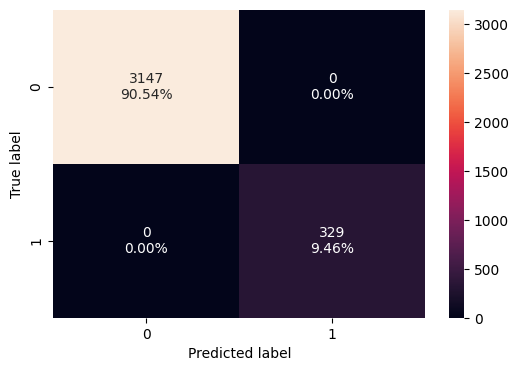

In [229]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [230]:
# Evaluate the decision tree model performance (model0) on the training data (X_train, y_train)
decision_tree_performance_train_default = model_performance_classification_sklearn(model0, X_train, y_train)
decision_tree_performance_train_default

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

####Checking the performance of the model on test set






In [231]:
# Evaluate the decision tree model performance (model0) on the test data (X_test, y_test)
decision_tree_performance_test_default = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_performance_test_default

Accuracy    Recall  Precision        F1
0  0.979866  0.858108   0.933824  0.894366

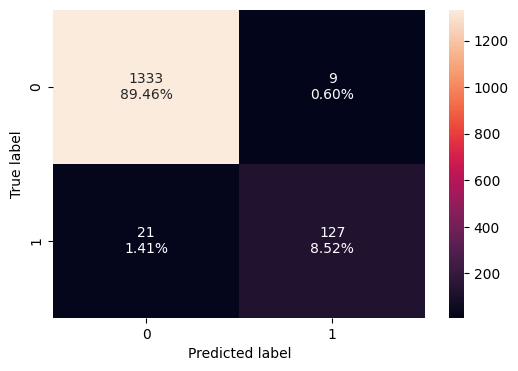

In [232]:
confusion_matrix_sklearn(model0, X_test, y_test)

* Model is giving good and generalized results on training and test set. but on training set is acting better as it is overfit
* As we have different frequency in class A 10% and class B 90% then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

### Decision Tree Base model(with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data


In [233]:
# Create and train a decision tree classifier and set class_weight="balanced" to handle potential class imbalance
model_1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

####Checking the performance of the model on training set

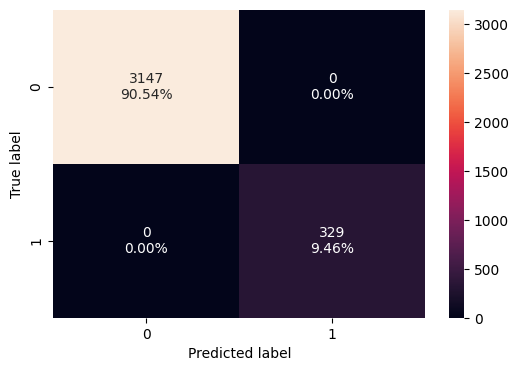

In [234]:
confusion_matrix_sklearn(model_1, X_train, y_train)

In [235]:
decision_tree_performance_train_wiht_weight = model_performance_classification_sklearn(
    model_1, X_train, y_train
)
decision_tree_performance_train_wiht_weight

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

####Check the model performance on test data

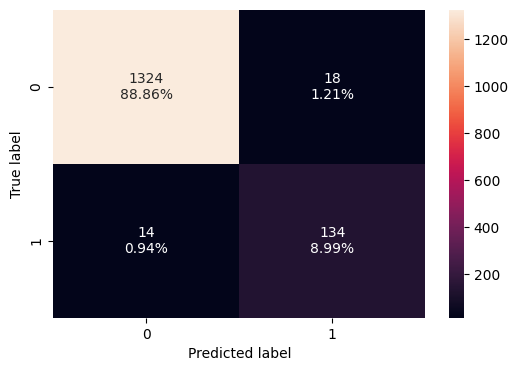

In [236]:
confusion_matrix_sklearn(model_1, X_test, y_test)

In [237]:
decision_tree_performance_test_wiht_weight = model_performance_classification_sklearn(
    model_1, X_test, y_test
)
decision_tree_performance_test_wiht_weight

Accuracy    Recall  Precision        F1
0  0.978523  0.905405   0.881579  0.893333

* The differences in recall score between training ans test set shows overfitting which will work on that in pre-pruning and post prununing.

#### Visualizing the tree

In [238]:
feature_names = list(X_train.columns)
importances = model_1.feature_importances_
indices = np.argsort(importances)

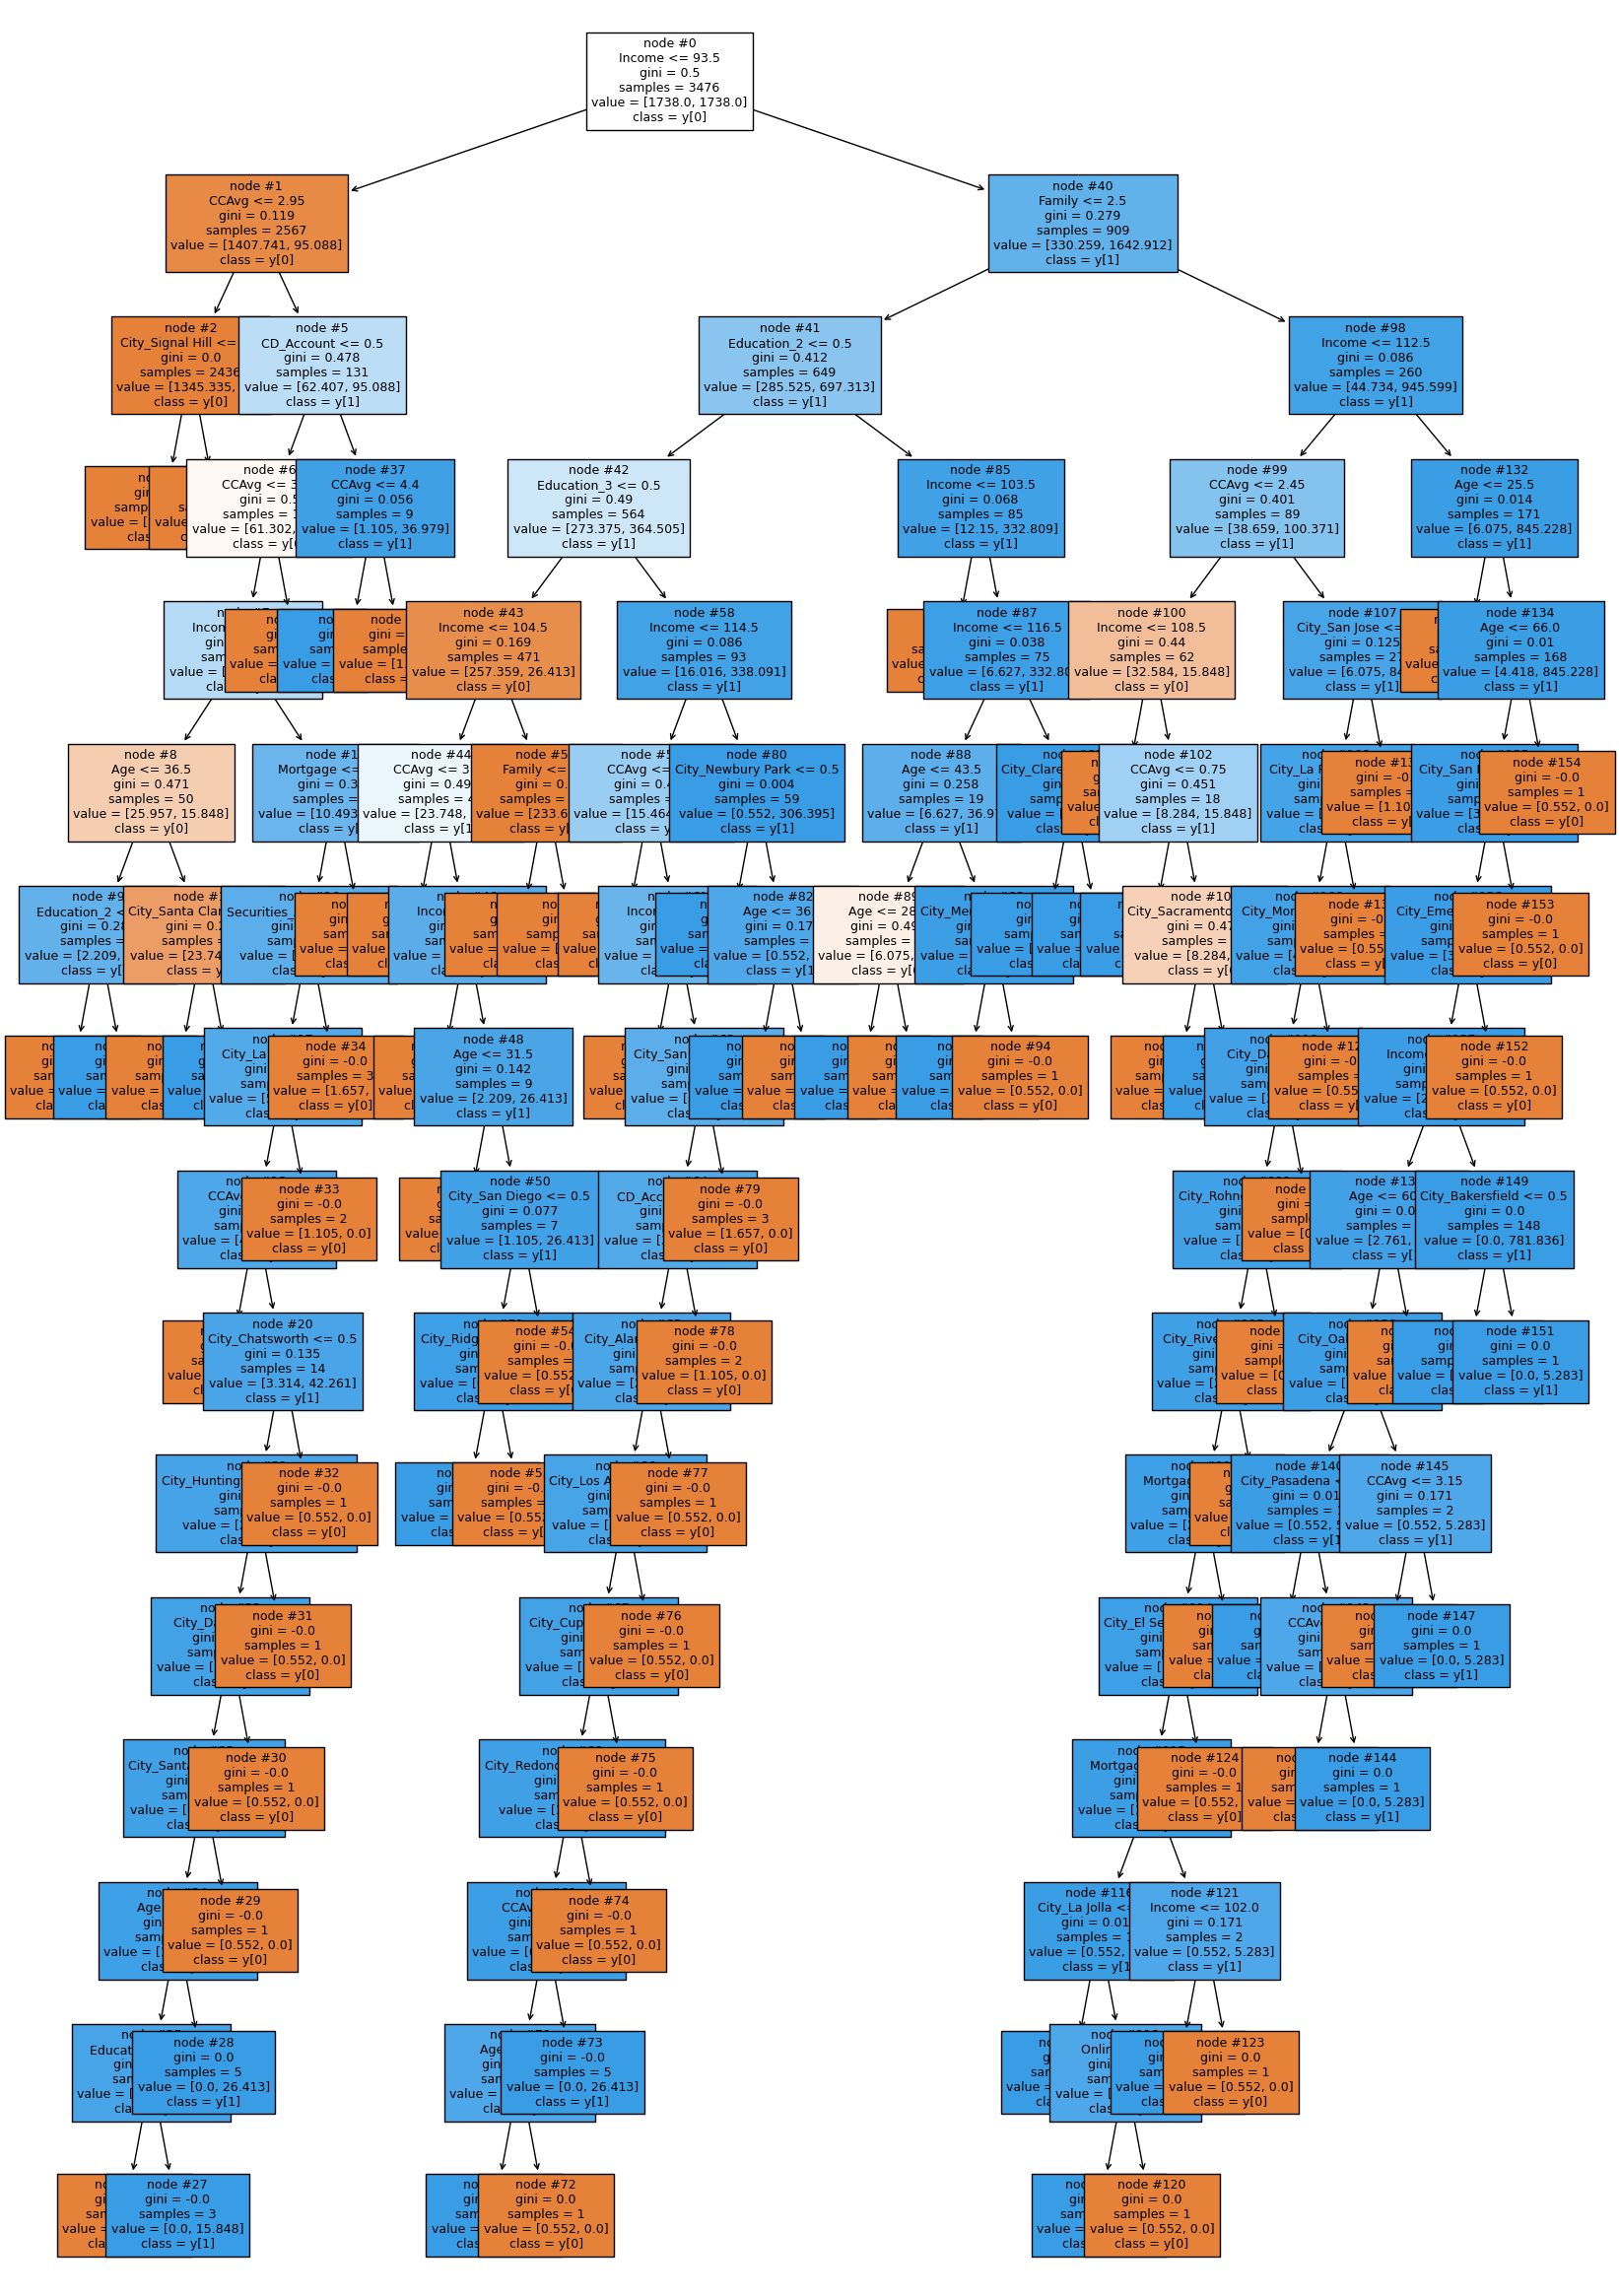

In [239]:
plt.figure(figsize=(20, 30))

tree.plot_tree(
    model_1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### Rules of a decision tree

In [240]:
# Text report showing the rules of a decision tree
print(tree.export_text(model_1, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- City_Signal Hill <= 0.50
|   |   |   |--- weights: [1343.68, 0.00] class: 0
|   |   |--- City_Signal Hill >  0.50
|   |   |   |--- weights: [1.66, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.75
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [2.21, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 10.57] class: 1
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- City_Santa Clara <= 0.50
|   |   |   |   |   |   |   |--- weights: [23.75, 0.00] class: 0
|   |   |   |   |   |   |--- City_Santa Clara >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 5.28] class: 1
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 89.00
|   |   |   |   |   |   |--- Securitie

#### Importance of features

In [241]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model_1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                     Imp
Income          0.631598
Education_3     0.135790
CCAvg           0.101910
Education_2     0.041964
Family          0.034168
...                  ...
City_Inglewood  0.000000
City_Irvine     0.000000
City_La Mesa    0.000000
City_La Mirada  0.000000
City_Yucaipa    0.000000

[254 rows x 1 columns]


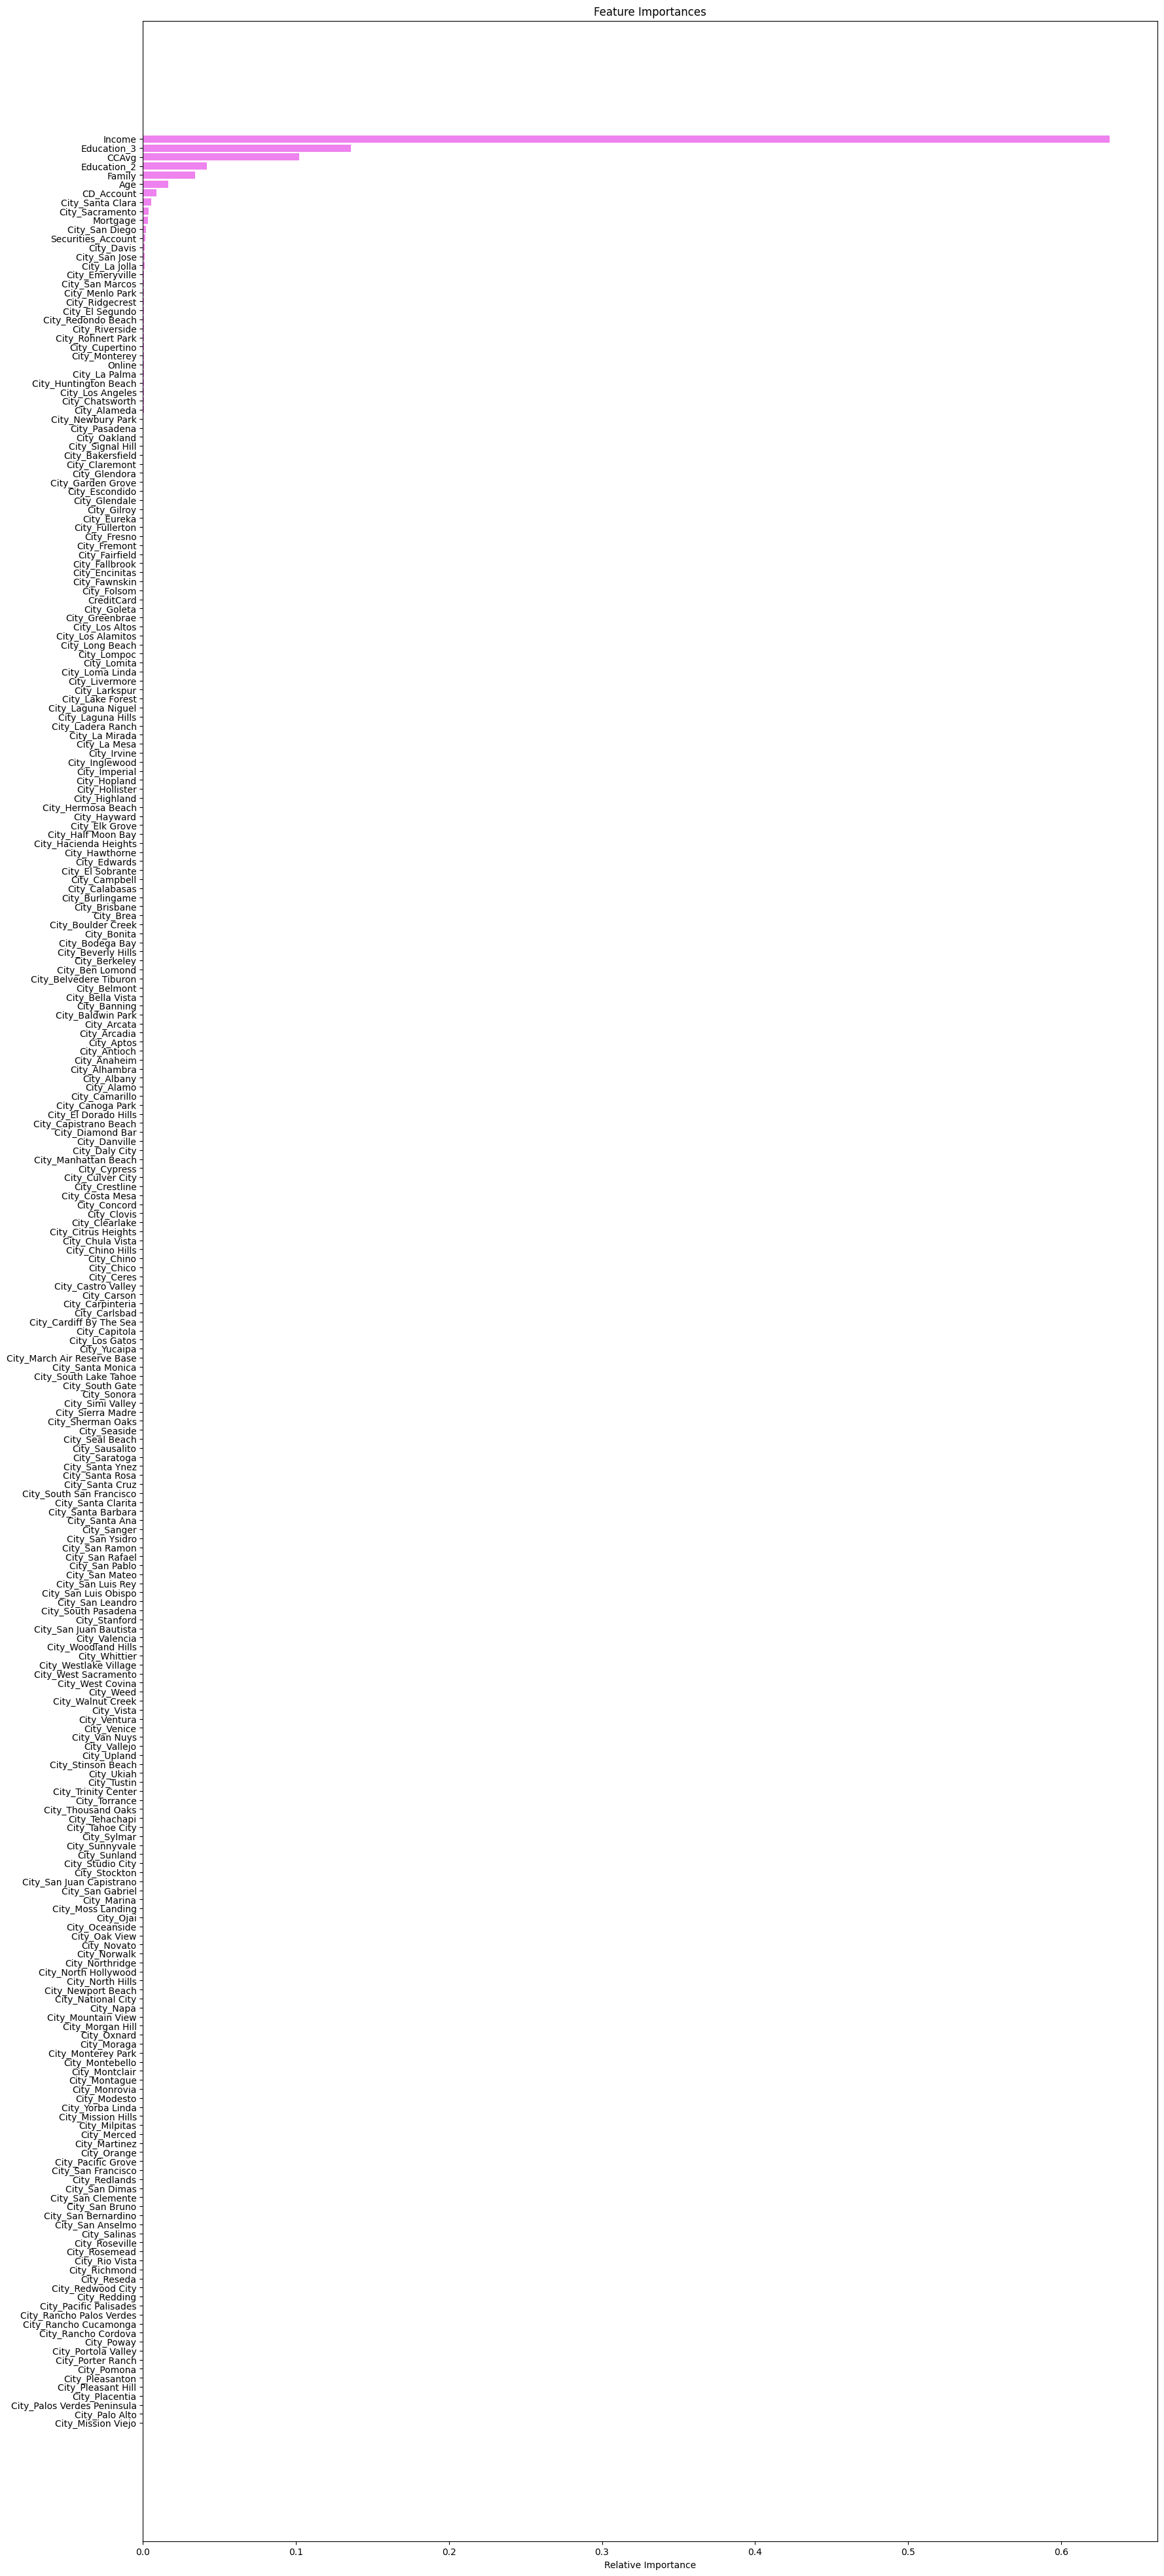

In [242]:
importances = model_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 50))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
* We have decrease in test set compare to training set which shows the models is overfit.
*Income, Education_3, CCAvg, Education_2, Family are top 5 most important features in this model.

### Model Performance Improvement

### Pre-pruning

#### Previous model depth, node_count nad number of leaves

In [243]:
print(f'''The max depth of the model_1 =  {model_1.tree_.max_depth}
The node_count ={model_1.tree_.node_count}
The number of leaves = {model_1.tree_.n_leaves}''')

The max depth of the model_1 =  15
The node_count =155
The number of leaves = 78


#### Using GridSearch for Hyperparameter tuning of our tree model

In [244]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the estimator to the best combination of parameters
estimator_pre_pruning = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator_pre_pruning .fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=7,
                       random_state=1)

####Checking performance on training set

In [245]:
decision_tree_performance_train_pre_pruning = model_performance_classification_sklearn(
    estimator_pre_pruning, X_train, y_train
)
decision_tree_performance_train_pre_pruning

Accuracy    Recall  Precision        F1
0  0.982451  0.829787   0.982014  0.899506

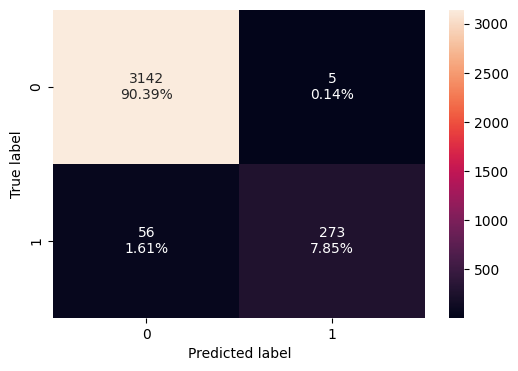

In [246]:
confusion_matrix_sklearn(estimator_pre_pruning, X_train, y_train)

####Check performance on test set

In [247]:
decision_tree_performance_test_pre_pruning = model_performance_classification_sklearn(
    estimator_pre_pruning, X_test, y_test
)

decision_tree_performance_test_pre_pruning

Accuracy    Recall  Precision        F1
0  0.983893  0.837838        1.0  0.911765

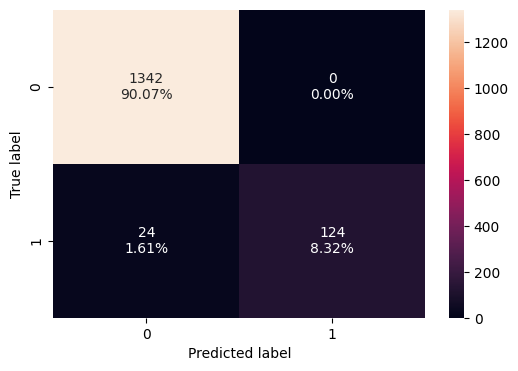

In [248]:
confusion_matrix_sklearn(estimator_pre_pruning, X_test, y_test)

* With pre pruning we have a simpleler model but recall decreased a little.

#### Plot the decision tree for this model

In [249]:
feature_names = list(X_train.columns)
importances = estimator_pre_pruning.feature_importances_
indices = np.argsort(importances)

**Visiaulizing the Decision tree**

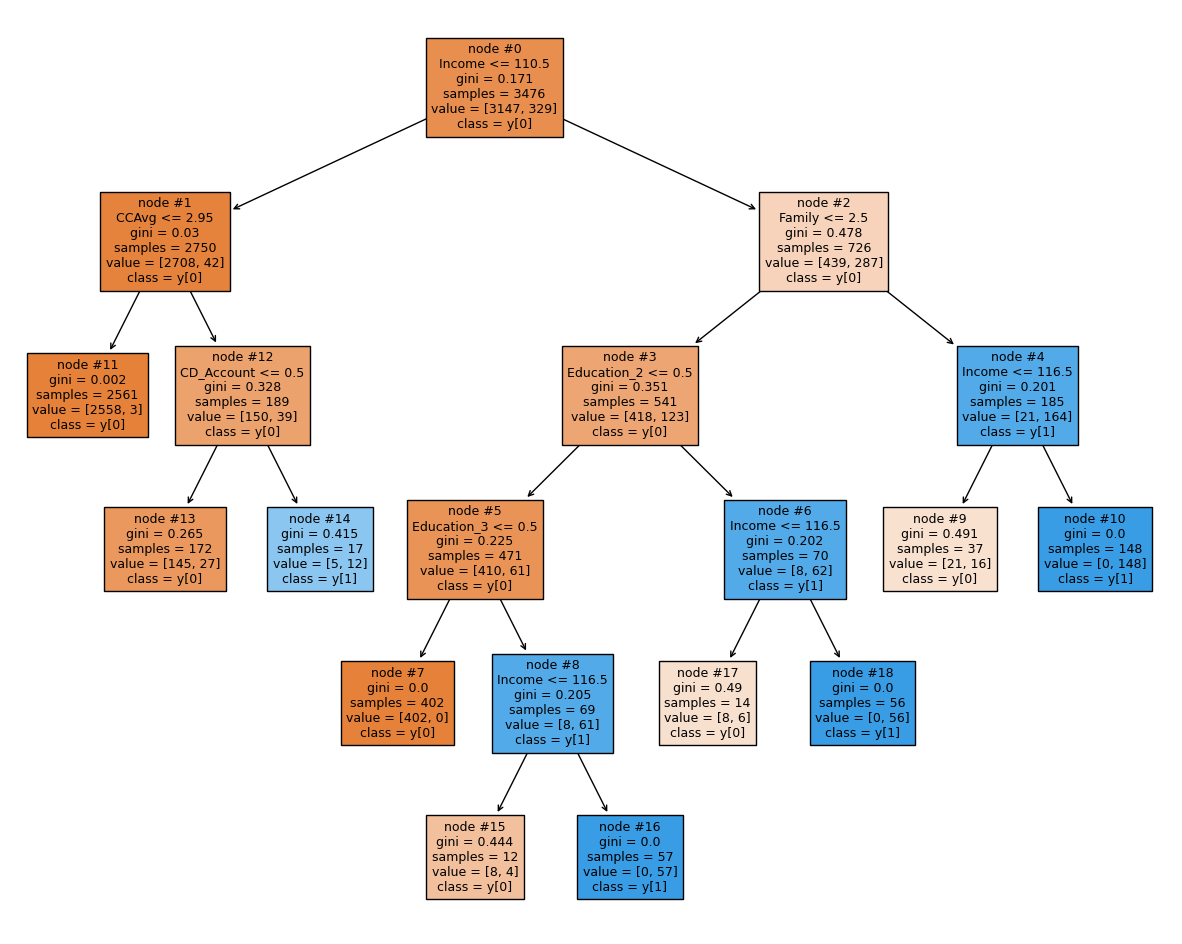

In [250]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator_pre_pruning,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### Rules of a decision tree

In [251]:
# Text report showing the rules of a decision tree

print(tree.export_text(estimator_pre_pruning, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2558.00, 3.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [145.00, 27.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [5.00, 12.00] class: 1
|--- Income >  110.50
|   |--- Family <= 2.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- weights: [402.00, 0.00] class: 0
|   |   |   |--- Education_3 >  0.50
|   |   |   |   |--- Income <= 116.50
|   |   |   |   |   |--- weights: [8.00, 4.00] class: 0
|   |   |   |   |--- Income >  116.50
|   |   |   |   |   |--- weights: [0.00, 57.00] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [8.00, 6.00] class: 0
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 56.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [21.00, 16.00] class: 0
|   |   |--- In

####Importance of features

In [252]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_pre_pruning.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.396832
Family              0.236360
Education_3         0.181641
Education_2         0.137530
CCAvg               0.029241
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
City_Yucaipa        0.000000

[254 rows x 1 columns]


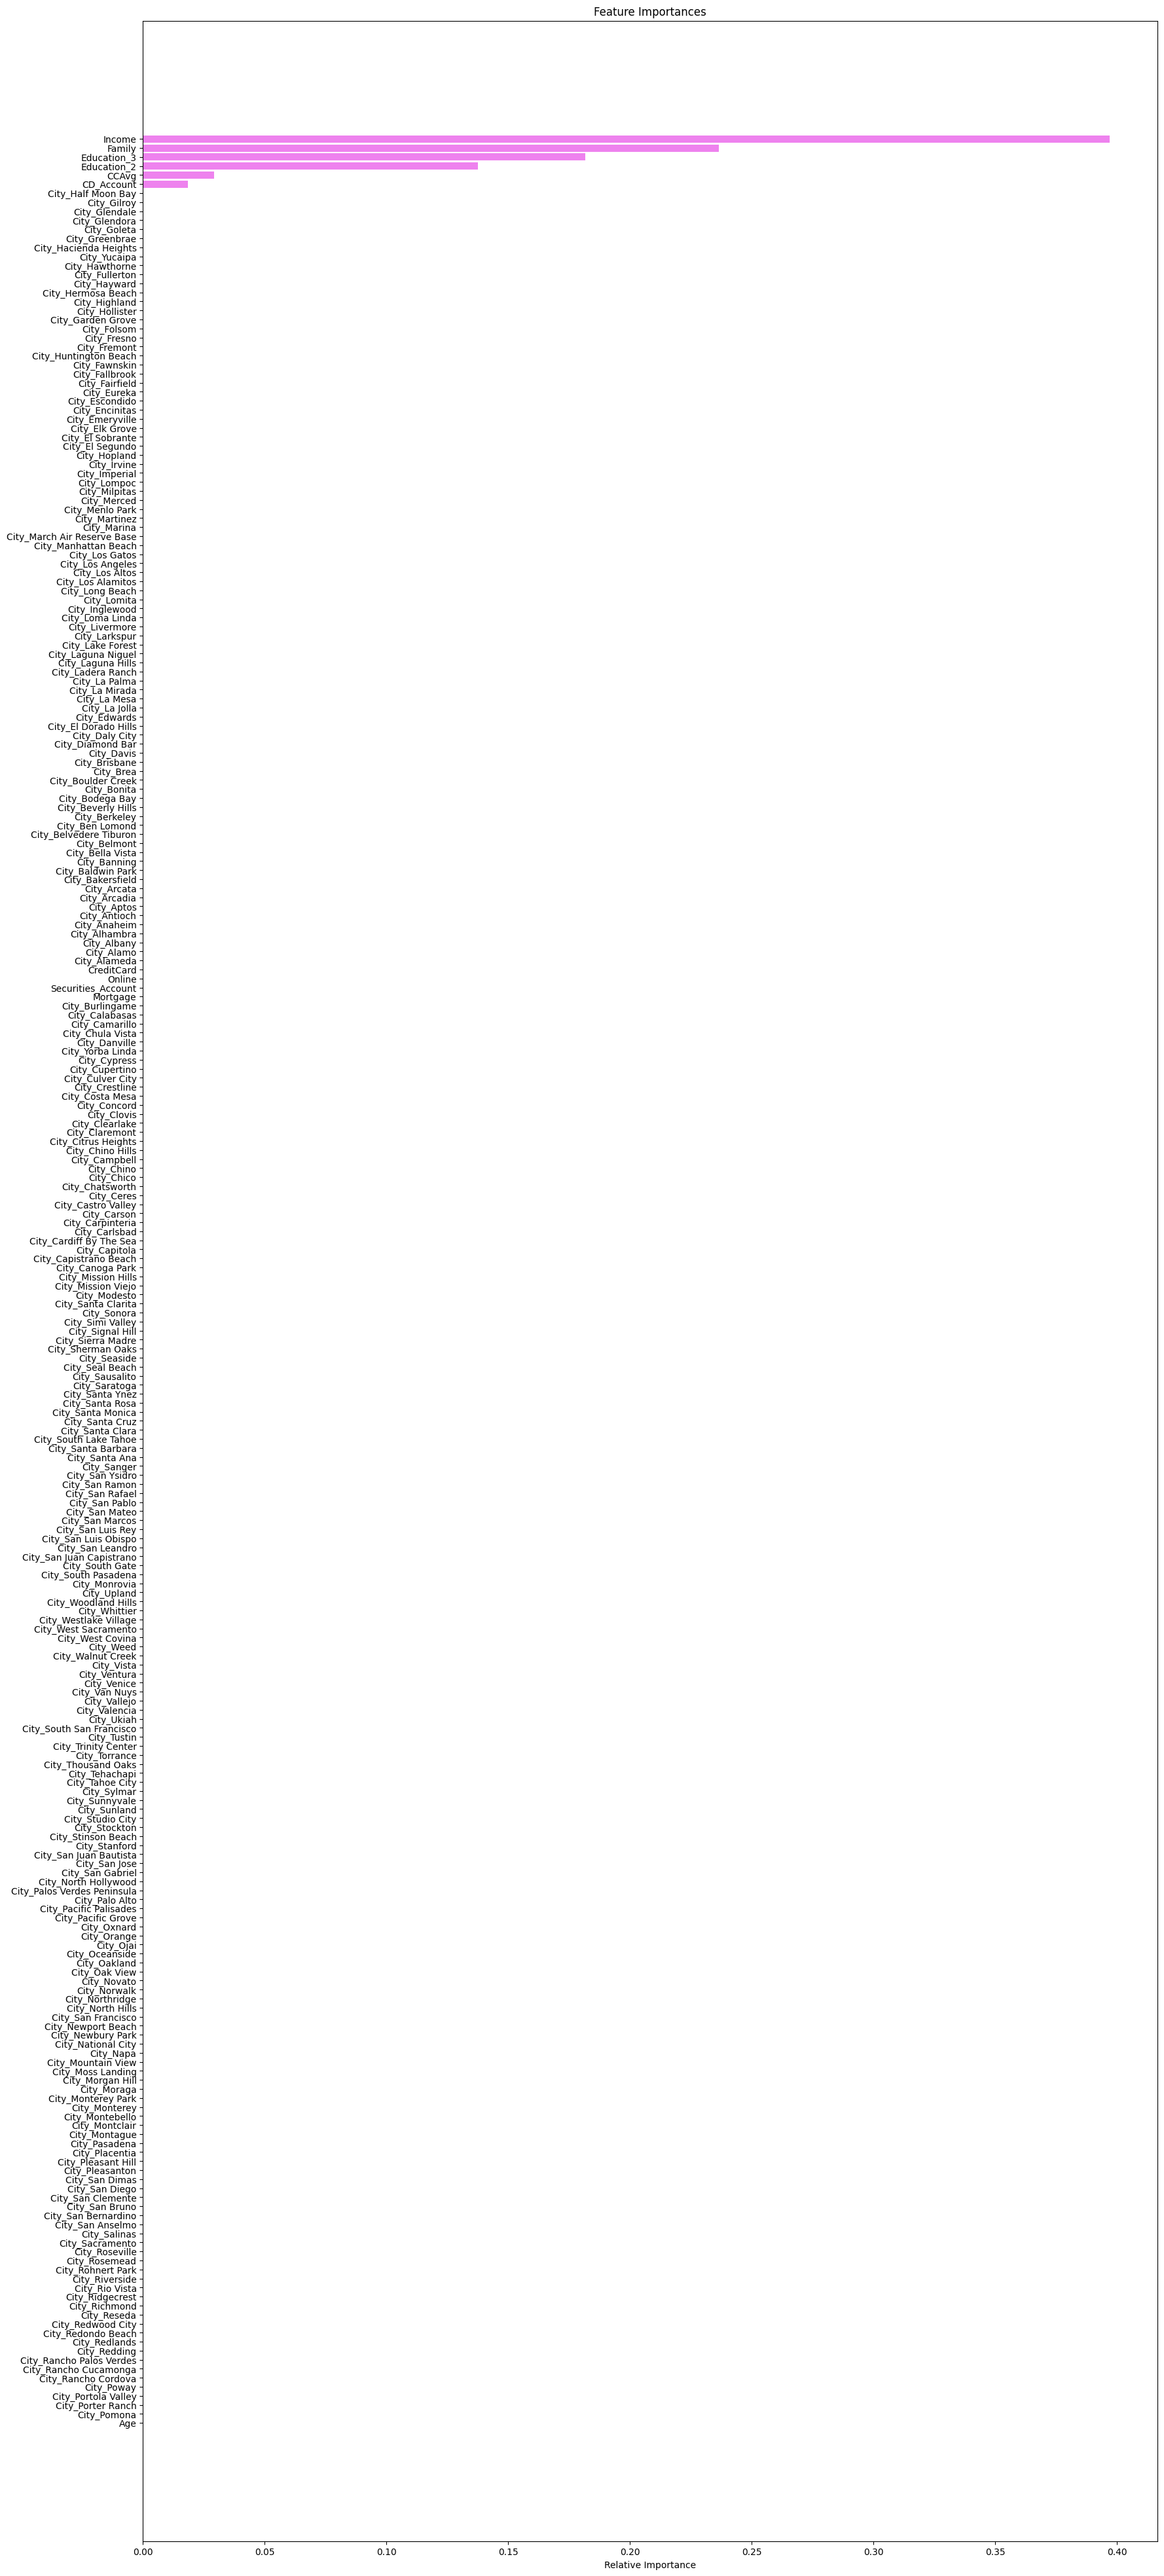

In [253]:
importances = estimator_pre_pruning.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 50))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [254]:
print(f'''The max depth of the estimator_pre_pruning =  {estimator_pre_pruning.tree_.max_depth}
The node_count ={estimator_pre_pruning.tree_.node_count}
The number of leaves = {estimator_pre_pruning.tree_.n_leaves}''')

The max depth of the estimator_pre_pruning =  5
The node_count =19
The number of leaves = 10


**Observations from the pre-pruned tree:**
* The model performance decreased but in the training and test are too close which shows the model is not overfit.
* Them model become simpler

### Decision Tree (Post pruning)

####Cost Complexity Pruning

In [255]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [256]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -6.985969e-17
1   2.834612e-17 -4.151357e-17
2   3.730730e-17 -4.206270e-18
3   7.491475e-17  7.070848e-17
4   1.289086e-16  1.996171e-16
5   1.561605e-04  3.123211e-04
6   1.561605e-04  9.369632e-04
7   1.568320e-04  1.564291e-03
8   1.585956e-04  1.881482e-03
9   2.872922e-04  3.030651e-03
10  2.946593e-04  4.798607e-03
11  2.962431e-04  6.872309e-03
12  3.050082e-04  7.482325e-03
13  3.123211e-04  7.794646e-03
14  3.808485e-04  9.698889e-03
15  5.210451e-04  1.021993e-02
16  5.212072e-04  1.126235e-02
17  5.599808e-04  1.182233e-02
18  5.629353e-04  1.238526e-02
19  6.170935e-04  1.300236e-02
20  7.206792e-04  1.372304e-02
21  7.235810e-04  1.444662e-02
22  8.701785e-04  1.531680e-02
23  9.415643e-04  1.625836e-02
24  1.004867e-03  1.726323e-02
25  1.051248e-03  1.831448e-02
26  1.142128e-03  2.174086e-02
27  1.305556e-03  2.304642e-02
28  1.565109e-03  2.617663e-02
29  2.305246e-03  3.078713e-02
30  2.389761e-03  3.317689e-02
31  2.403630e-03  3.558052e-02
32  2.501219e-03  3.808174e-02
33  3.004540e-03  4.108628e-02
34  3.005852e-03  4.409213e-02
35  4.086959e-03  5.226605e-02
36  5.017148e-03  5.728320e-02
37  5.854971e-03  6.899314e-02
38  6.588019e-03  7.558116e-02
39  2.957040e-02  1.051516e-01
40  3.477177e-02  2.094669e-01
41  2.905331e-01  5.000000e-01

#### Total Impurity vs effective alpha for training set

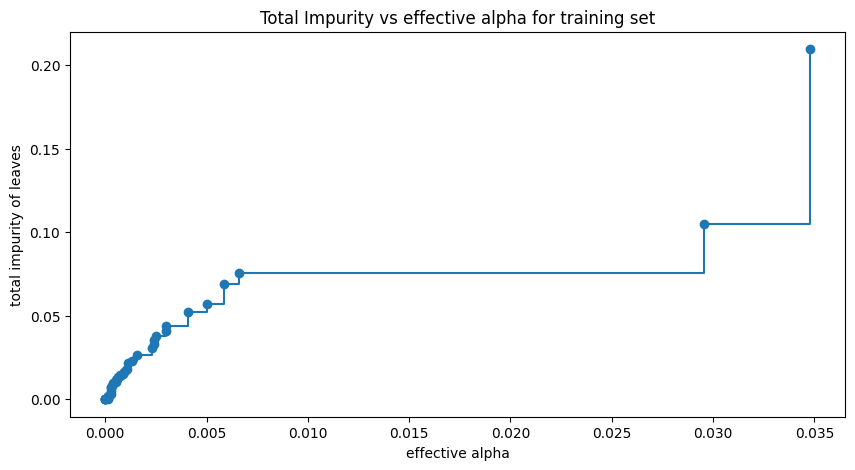

In [257]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [258]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29053314130976404



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

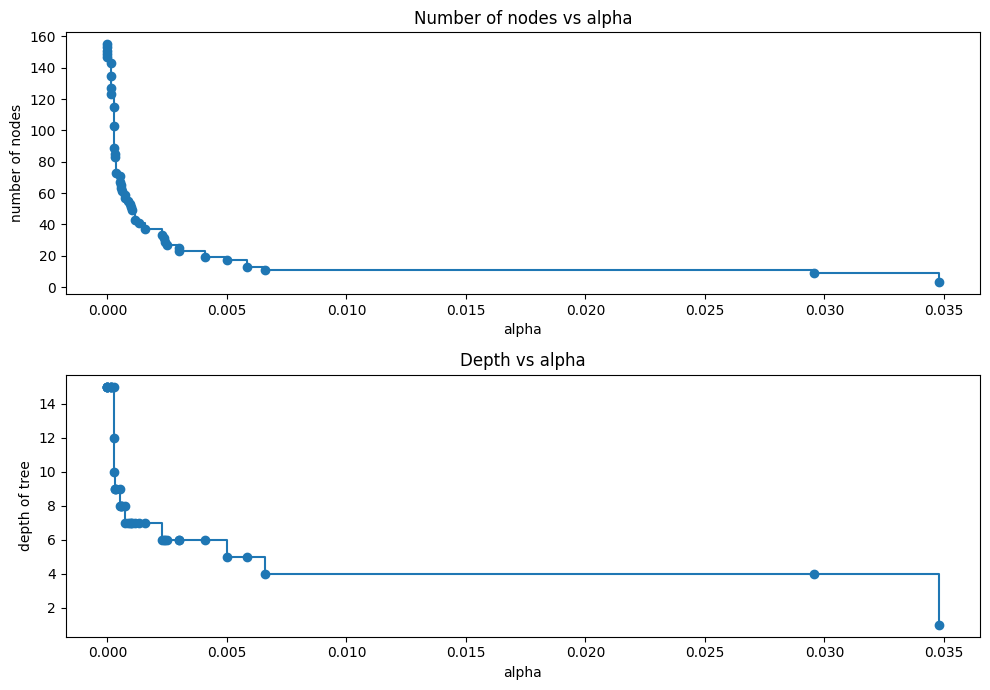

In [259]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

####Recall vs alpha for training and testing sets

In [260]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [261]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

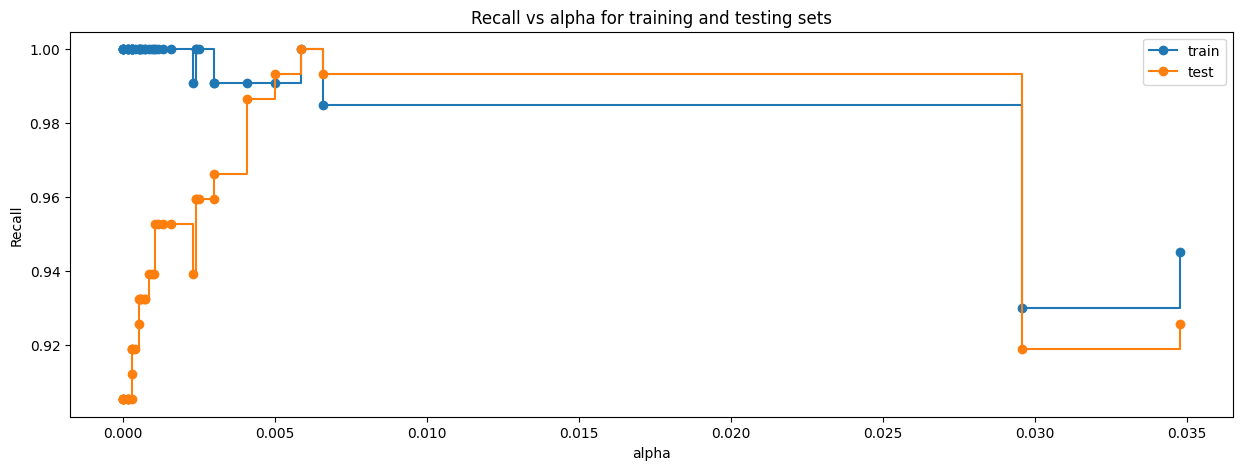

In [262]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Creating the model where we get highest train and test recall

In [263]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.005854971490133809, class_weight='balanced',
                       random_state=1)


**Post-Pruning Model**

In [264]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=best_model.ccp_alpha, class_weight='balanced', random_state=1)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005854971490133809, class_weight='balanced',
                       random_state=1)

**Checking model performance on training set**

In [265]:
decision_tree_performance_train_post_pruning  = model_performance_classification_sklearn(
    estimator_2, X_train, y_train
)
decision_tree_performance_train_post_pruning

Accuracy  Recall  Precision       F1
0  0.917146     1.0   0.533225  0.69556

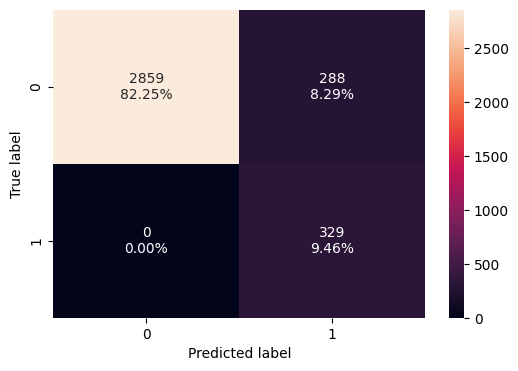

In [266]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

**Checking model performance on test set**

In [267]:
decision_tree_performance_test_post_pruning = model_performance_classification_sklearn(
    estimator_2, X_test, y_test
)
decision_tree_performance_test_post_pruning

Accuracy  Recall  Precision        F1
0   0.92349     1.0   0.564885  0.721951

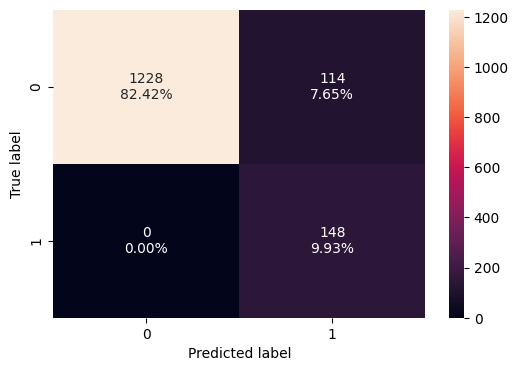

In [268]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

**Observations:**
* With the ccp_alpha=0.005854971490133809 and  class_weight='balanced' we improved recall to 1 in both test and training set it is noticable that the accuracy is higher than 90% .


#### Ploting decision tree of best model

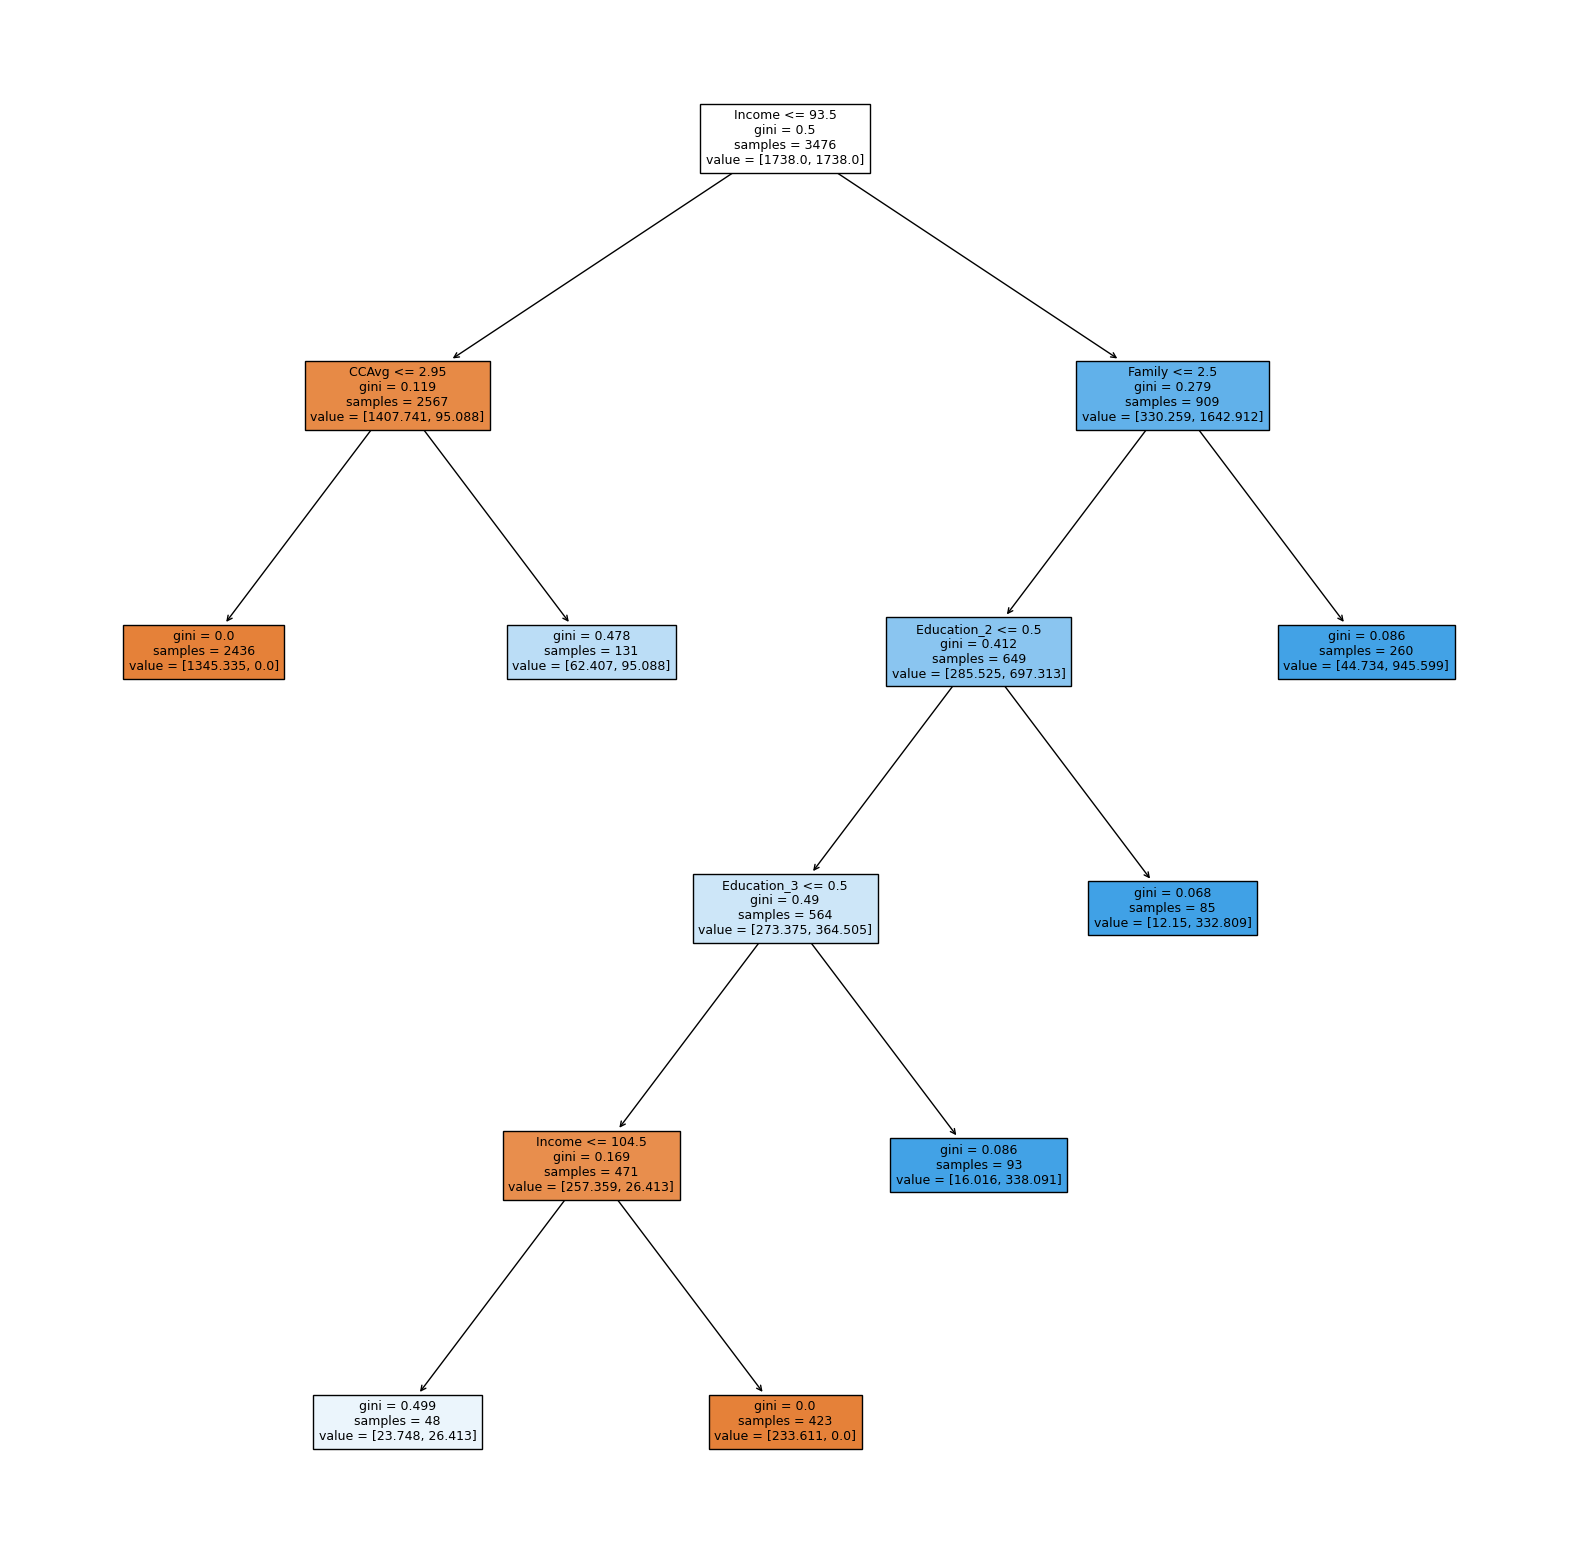

In [269]:
plt.figure(figsize=(20, 20))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### rules of a decision tree

In [270]:
# Text report showing the rules of a decision tree

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1345.33, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [62.41, 95.09] class: 1
|--- Income >  93.50
|   |--- Family <= 2.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- Income <= 104.50
|   |   |   |   |   |--- weights: [23.75, 26.41] class: 1
|   |   |   |   |--- Income >  104.50
|   |   |   |   |   |--- weights: [233.61, 0.00] class: 0
|   |   |   |--- Education_3 >  0.50
|   |   |   |   |--- weights: [16.02, 338.09] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [12.15, 332.81] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [44.73, 945.60] class: 1



#### importance of features

In [271]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.689365
Education_3         0.156148
CCAvg               0.068608
Education_2         0.046242
Family              0.039637
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
City_Yucaipa        0.000000

[254 rows x 1 columns]


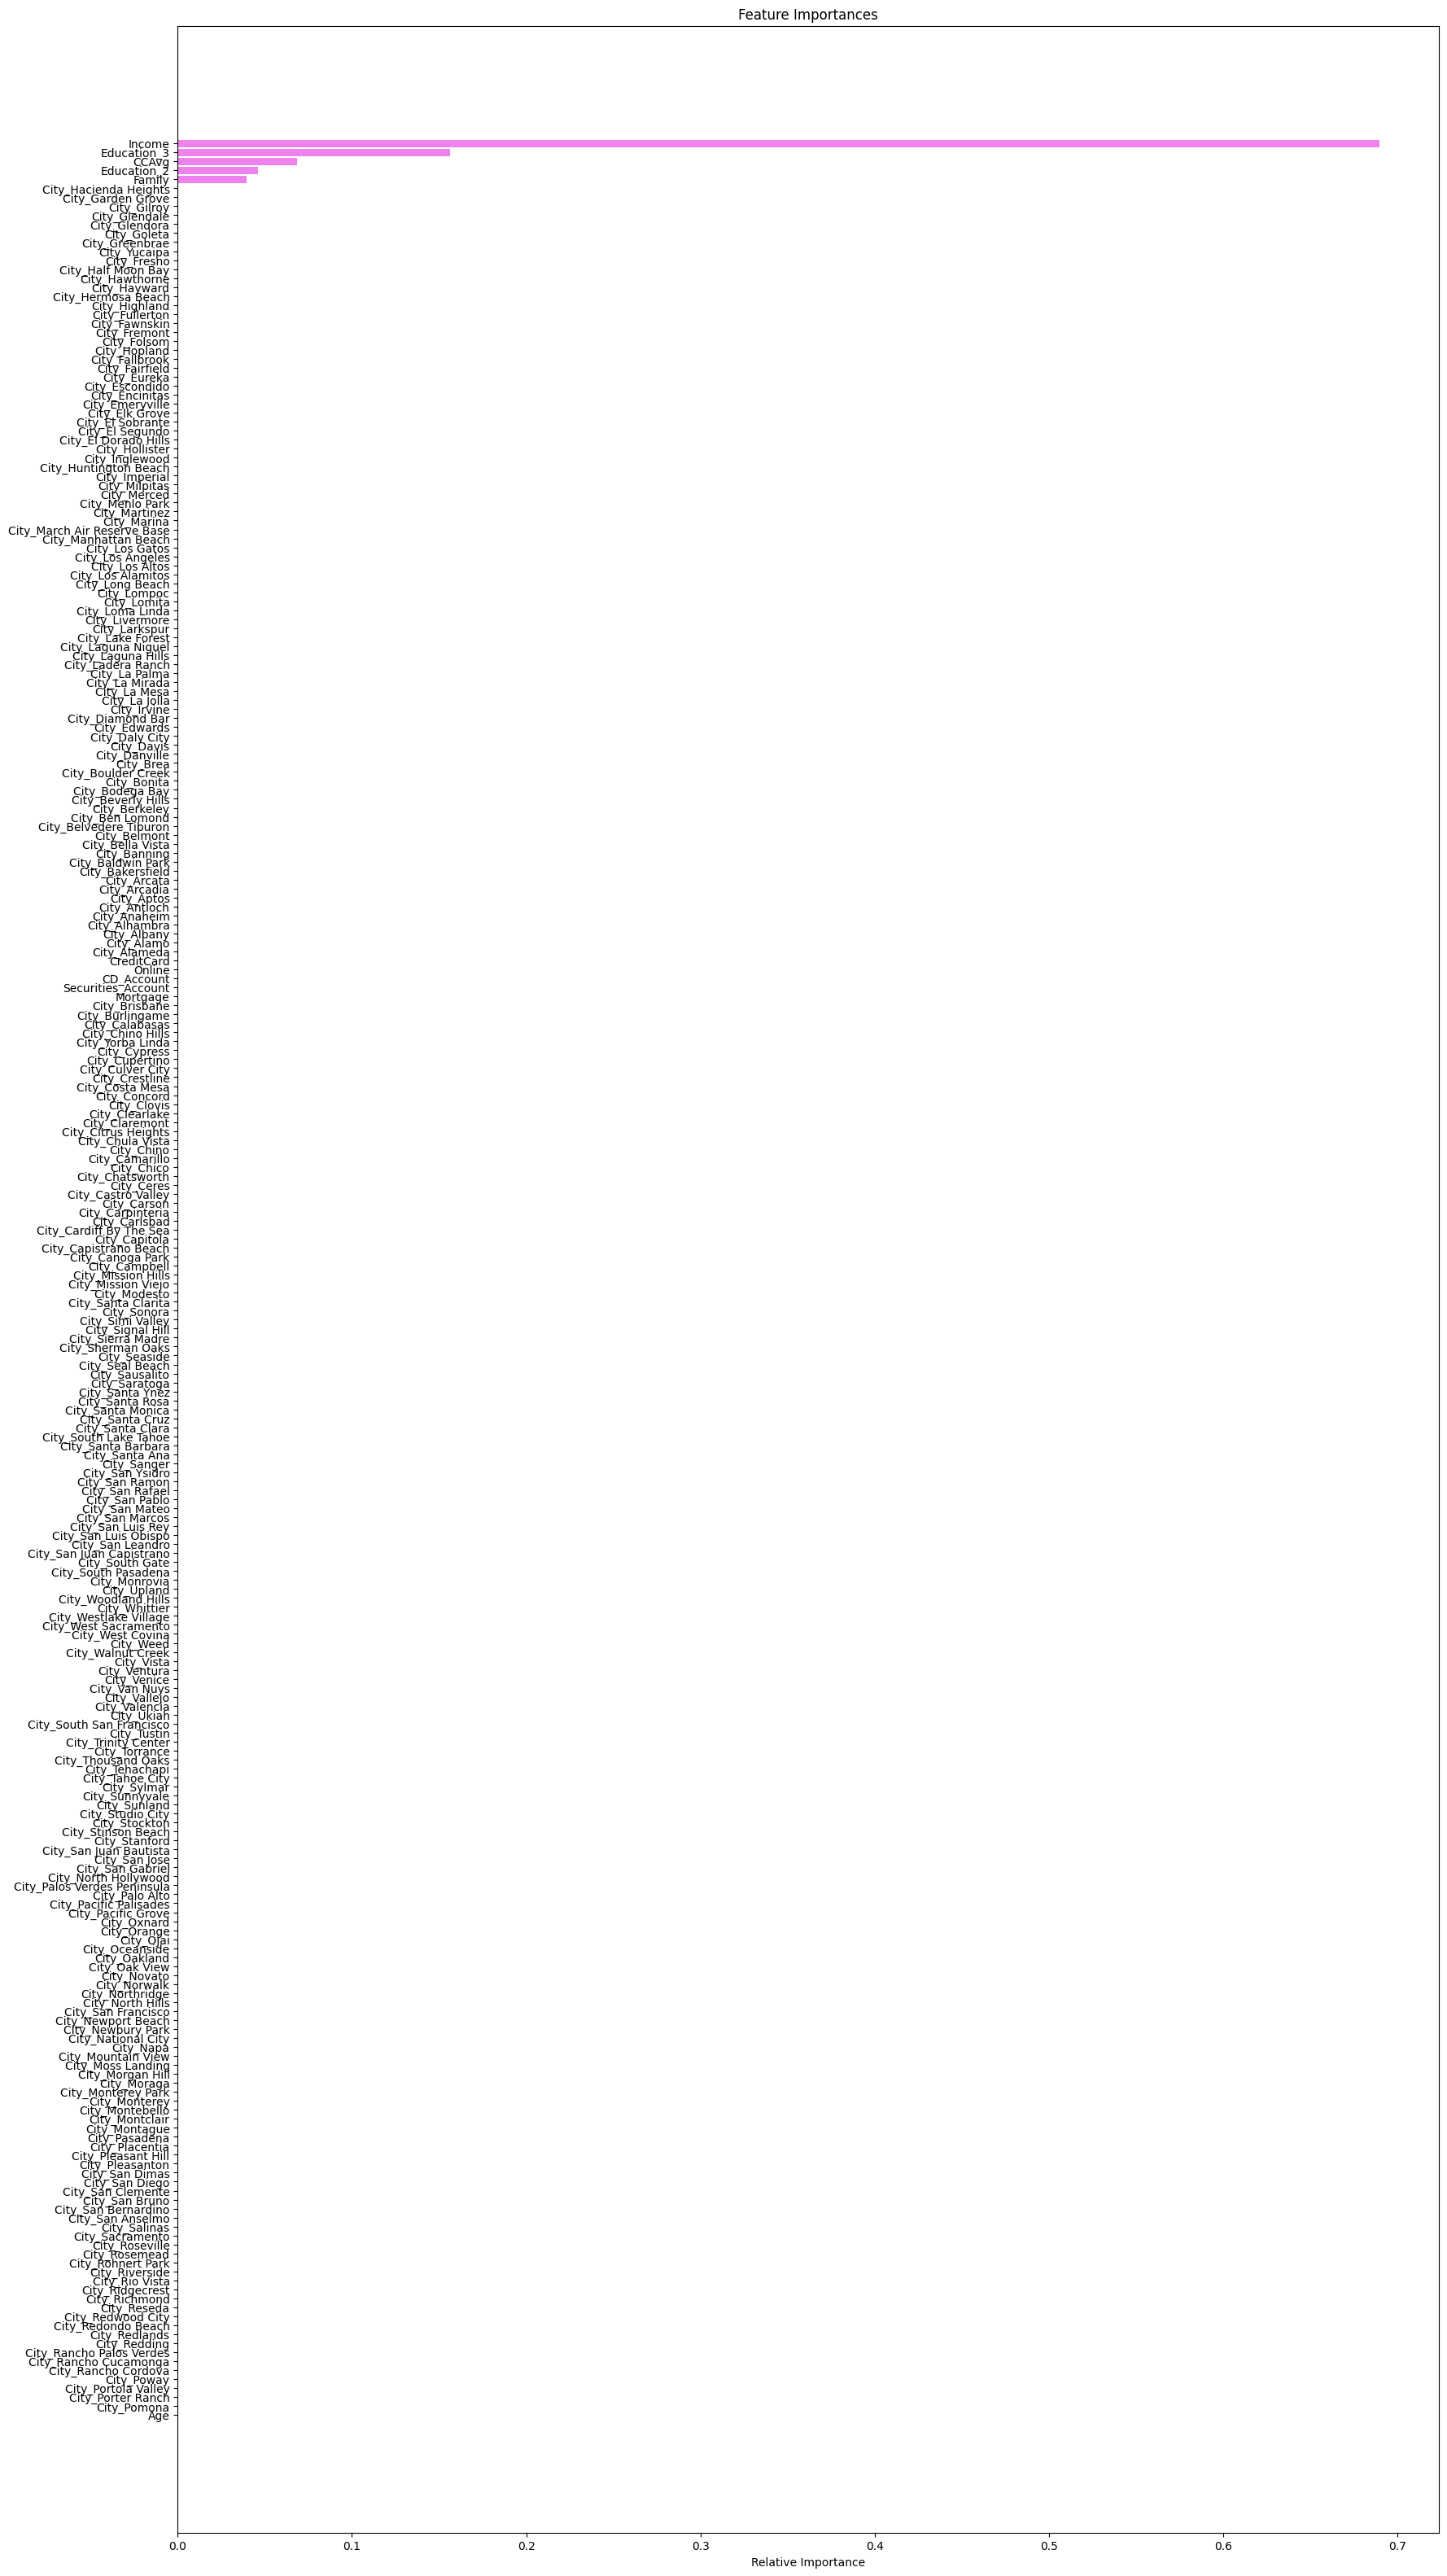

In [272]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 40))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [273]:
print(f'''The max depth of the estimator_pre_pruning =  {estimator_2.tree_.max_depth}
The node_count ={estimator_2.tree_.node_count}
The number of leaves = {estimator_2.tree_.n_leaves}''')

The max depth of the estimator_pre_pruning =  5
The node_count =13
The number of leaves = 7


## Model Comparison and Final Model Selection

**training performance comparison**

In [274]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_performance_train_default.T,
        decision_tree_performance_train_wiht_weight.T,
        decision_tree_performance_train_pre_pruning.T,
        decision_tree_performance_train_post_pruning.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df



Training performance comparison:


Decision Tree without class_weight  \
Accuracy                                  1.0   
Recall                                    1.0   
Precision                                 1.0   
F1                                        1.0   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.982451   
Recall                                 1.0                     0.829787   
Precision                              1.0                     0.982014   
F1                                     1.0                     0.899506   

           Decision Tree (Post-Pruning)  
Accuracy                       0.917146  
Recall                         1.000000  
Precision                      0.533225  
F1                             0.695560

**test performance comparison**

In [275]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_performance_test_default.T,
        decision_tree_performance_test_wiht_weight.T,
        decision_tree_performance_test_pre_pruning.T,
        decision_tree_performance_test_post_pruning.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                             0.979866   
Recall                               0.858108   
Precision                            0.933824   
F1                                   0.894366   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                          0.978523                     0.983893   
Recall                            0.905405                     0.837838   
Precision                         0.881579                     1.000000   
F1                                0.893333                     0.911765   

           Decision Tree (Post-Pruning)  
Accuracy                       0.923490  
Recall                         1.000000  
Precision                      0.564885  
F1                             0.721951

**Comparing Recall**

In [276]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree without class_weight(Initial)','Decision Tree with class_weight(Base Model)','Decision Tree (Pre-Pruning)',
                                         'Decision Tree (Post-Pruning)'],
                                 'Train_Recall':[decision_tree_performance_train_default.T.loc['Recall'][0] , decision_tree_performance_train_wiht_weight.T.loc['Recall'][0],decision_tree_performance_train_pre_pruning.T.loc['Recall'][0] ,decision_tree_performance_train_post_pruning.T.loc['Recall'][0]],
                                 'Test_Recall':[decision_tree_performance_test_default.T.loc['Recall'][0] ,decision_tree_performance_test_wiht_weight.T.loc['Recall'][0],decision_tree_performance_test_pre_pruning.T.loc['Recall'][0],decision_tree_performance_test_post_pruning.T.loc['Recall'][0]]})
comparison_frame

Model  Train_Recall  Test_Recall
0  Decision Tree without class_weight(Initial)      1.000000     0.858108
1  Decision Tree with class_weight(Base Model)      1.000000     0.905405
2                  Decision Tree (Pre-Pruning)      0.829787     0.837838
3                 Decision Tree (Post-Pruning)      1.000000     1.000000

**Observations**
* Among all models the final model model has the best performace. so theat is the model we select. we have all parameters and detailed information about that model above(model estimator_2)
* Best parameters for this model are ccp_alpha=0.005854971490133809 and class_weight='balanced'.
* Importance features are  as below:
                  Income
                  Education_3
                  CCAvg
                  Education_2
                  Family


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Insights**



1.   **Importance of data quality:**
   - The quality and accuracy of the data used to train the model are crucial for its performance.
   - The bank should ensure that the data is complete, consistent, and relevant.
2.   **Consideration of opportunity loss:**
   - The bank should prioritize minimizing opportunity loss, which occurs when potential customers who would accept a loan are not identified.
   - This can be achieved by using a model that optimizes for recall.

3. **Balancing accuracy and interpretability:**
   - While complex models may achieve higher accuracy, they can be more difficult to interpret and explain.
   - The bank should strike a balance between accuracy and interpretability to ensure that the model is both effective and understandable.

4. **Continuous improvement:**
   - The model should be viewed as a starting point rather than a final solution.
   - The bank should continuously monitor its performance and explore ways to improve its effectiveness.




**Recommendations:**


1.  **Focus on high-potential customers:**
   - Target customers with high Income, Education_3, CCAvg, Education_2, and Family.
   - These factors have a significant impact on loan acceptance.
2.  **Tailor marketing campaigns:**
   - Develop personalized marketing campaigns based on customer profiles.
   - Offer incentives or benefits that cater to the specific needs and preferences of different customer segments.
3.  **Improve risk assessment:**
   - Utilize the trained model to identify customers with a higher likelihood of accepting a personal loan.
   - This can help the bank make more informed lending decisions and mitigate potential risks.
4. **Enhance customer experience:**
   - Streamline the loan application process to make it convenient and user-friendly.
   - Provide clear information about the terms, conditions, and benefits of personal loans.
5. **Monitor and refine the model:**
   - Regularly monitor the performance of the model and update it with new data to ensure its continued effectiveness.
   - This will help the bank adapt to changing market conditions and customer preferences.




___